In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

conf_key = {'CHI':1163450153, 'CSCW':1195049314, 'UBI':1171345118, 'UIST':1166315290}

ori_paperyear_conf = {}
ori_citingpatent_conf = {}

In [2]:
# join paperid with paperyear and papercitation2science
df_year = pd.read_csv('../data/paperyear_result.tsv', usecols=[1,2])
df_paperid = pd.read_csv('../data/HCI_paperids.tsv', sep='\t')
df_paper_year = df_year.merge(df_paperid)

df_papercitation2science = pd.read_csv('../data/papercitationscience_result.tsv', usecols=[3,4])
df_paper_pc2s = df_papercitation2science.merge(df_paperid)
df_paper_pc2s_year = df_paper_pc2s.merge(df_paper_year)
df_paper_pc2s_year.head(5)

paperid    patent      confid  year
0  2134161165  10001804  1163450153  1994
1  2134161165   6024576  1163450153  1994
2  2134161165   6028593  1163450153  1994
3  2134161165   6057828  1163450153  1994
4  2134161165   6078308  1163450153  1994

In [3]:
for conf_name,conf_id in conf_key.items():
    ori_paperyear_conf[conf_name] = df_paper_year.loc[df_paper_year['confid']==conf_id]
    ori_citingpatent_conf[conf_name] = df_paper_pc2s.loc[df_paper_pc2s['confid']==conf_id]

ori_citingpatent_conf['CHI'].head(5)

paperid    patent      confid
0  2134161165  10001804  1163450153
1  2134161165   6024576  1163450153
2  2134161165   6028593  1163450153
3  2134161165   6057828  1163450153
4  2134161165   6078308  1163450153

In [4]:
paperyear_map_conf = {}
inv_paperyear_map_conf = {}
for conf, df in ori_paperyear_conf.items():
    paperyear_map = {}
    inv_paperyear_map = {}
    for row in df.iterrows():
        paperid = str(row[1]).split(',')[0].split('\n')[0].split()[1] # paperid
        paperyear = str(row[1]).split(',')[0].split('\n')[1].split()[1] # paperyear 
        if paperyear not in paperyear_map.keys():
            paperyear_map[paperyear] = []    
        if paperid not in paperyear_map[paperyear]:
            paperyear_map[paperyear].append(paperid)
        inv_paperyear_map[paperid] = paperyear
    paperyear_map_conf[conf] = paperyear_map
    inv_paperyear_map_conf[conf] = inv_paperyear_map
print(">>> done paper year map construction")

>>> done paper year map construction


In [5]:
citingpatent_map_conf = {}
citedpaper_map_conf = {}
for conf, df in ori_citingpatent_conf.items():
    citingpatent_map = {}
    citedpaper_map = {}
    inv_paperyear_map = inv_paperyear_map_conf[conf]
    for row in df.iterrows():
        paperid = str(row[1]).split(',')[0].split('\n')[0].split()[1] # paperid
        patentid = str(row[1]).split(',')[0].split('\n')[1].split()[1] # patentid
        # paperyear
        paperyear = inv_paperyear_map[paperid]
        if paperyear not in citingpatent_map.keys():
            citingpatent_map[paperyear] = []
        if paperyear not in citedpaper_map.keys():
            citedpaper_map[paperyear] = []  
        citingpatent_map[paperyear].append(patentid)
        # unique cited paper this year
        if paperid not in citedpaper_map[paperyear]:
            citedpaper_map[paperyear].append(paperid)
    citingpatent_map_conf[conf] = citingpatent_map
    citedpaper_map_conf[conf] = citedpaper_map
print(">>> done citing data")

>>> done citing data


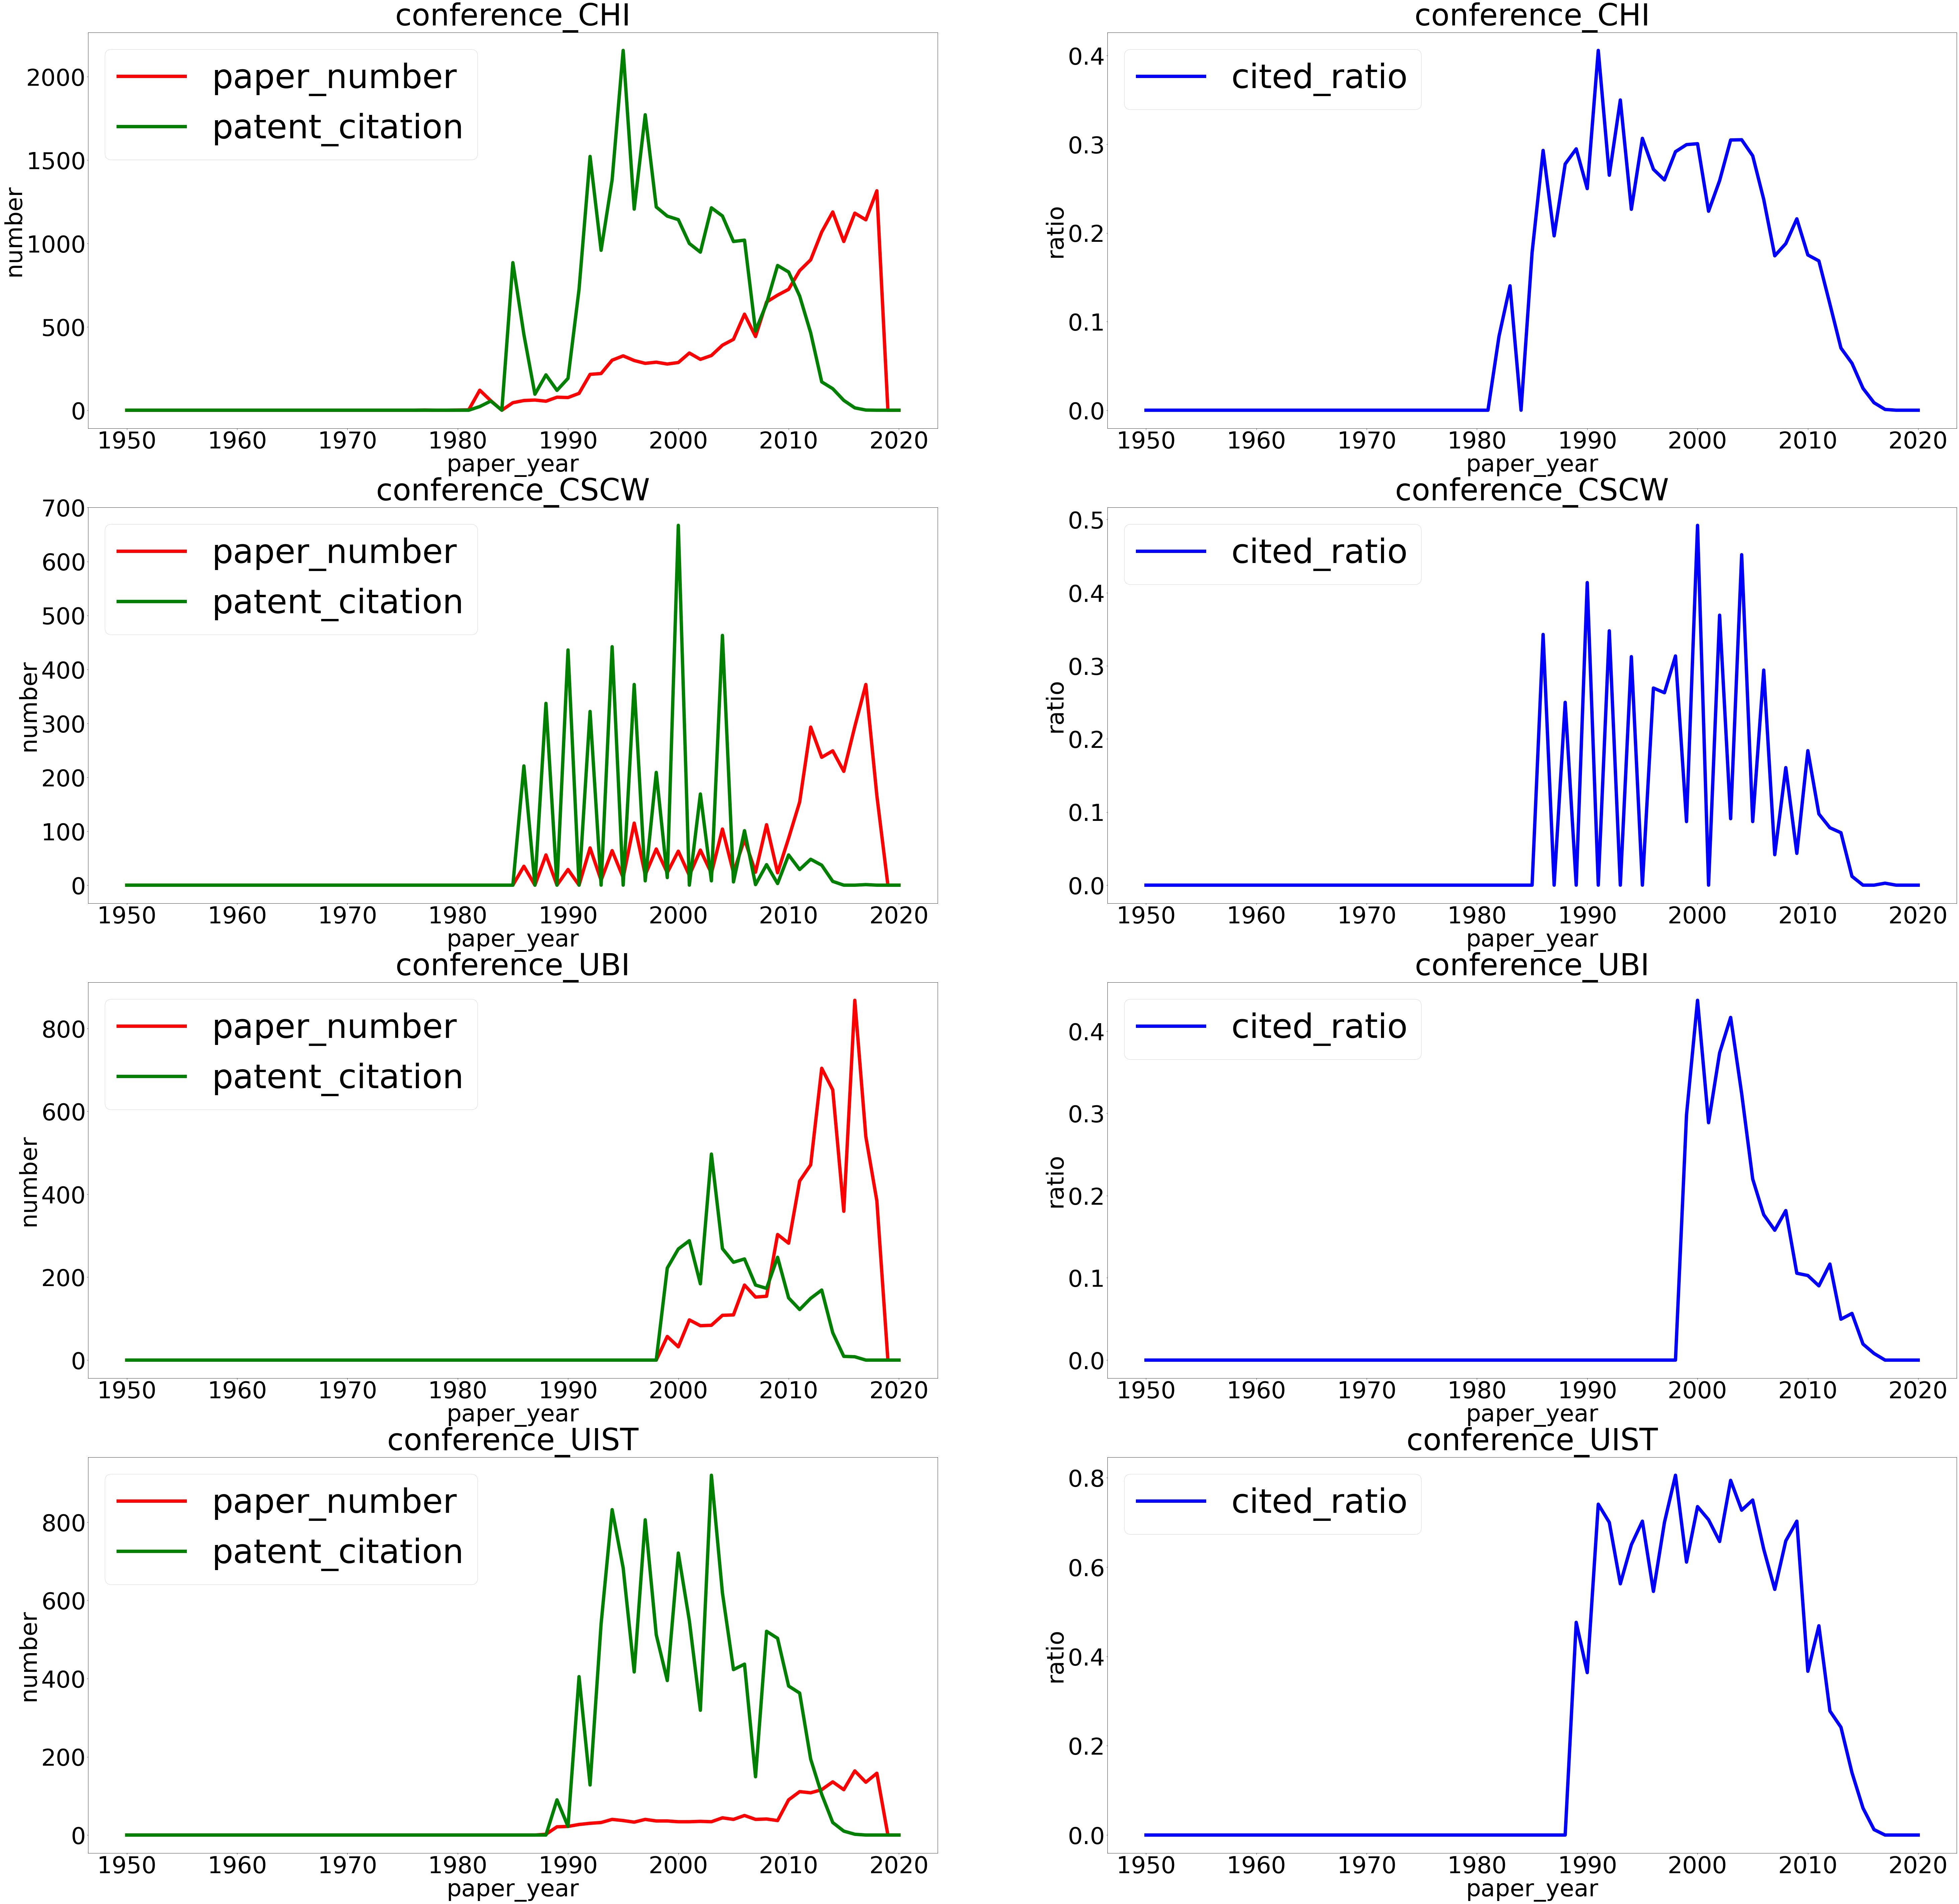

In [6]:
# Visualization
fig = plt.figure(figsize=(100,100))
axes = fig.subplots(nrows=4, ncols=2)
for ax in axes:
    ax[0].set_ylabel("number", fontsize=70)
    ax[1].set_ylabel("ratio", fontsize=70)
    for ax_c in ax:
        ax_c.set_xlabel("paper_year", fontsize=70)
        ax_c.tick_params(labelsize=70)

plot_idx = 0

X_year = [i for i in range (1950, 2021)]

for conf, paperyear_map in paperyear_map_conf.items():
    Y_papercnt = [0] * 71
    Y_citingpatentcnt = [0] * 71
    Y_citedportion = [0.0] * 71

    citingpatent_map = citingpatent_map_conf[conf]
    citedpaper_map = citedpaper_map_conf[conf]
    for i in range (1950, 2021):
        if str(i) in paperyear_map.keys():
            Y_papercnt[i-1950] = len(paperyear_map[str(i)])
        if str(i) in citingpatent_map.keys():
            Y_citingpatentcnt[i-1950] = len(citingpatent_map[str(i)])    
        if str(i) in citedpaper_map.keys():
            Y_citedportion[i-1950] = len(citedpaper_map[str(i)]) / Y_papercnt[i-1950]
    axes[plot_idx, 0].plot(X_year,Y_papercnt, 'o-', label='paper_number', color='r', linewidth = 10)
    axes[plot_idx, 0].plot(X_year,Y_citingpatentcnt, 'o-', label='patent_citation', color='g', linewidth = 10)
    axes[plot_idx, 0].set_title('conference_{}'.format(conf), fontsize=90)
    axes[plot_idx, 0].legend(loc = 'upper left', prop={'size': 100})
    axes[plot_idx, 1].plot(X_year,Y_citedportion, 'o-', label='cited_ratio', color='b', linewidth = 10 )
    axes[plot_idx, 1].set_title('conference_{}'.format(conf), fontsize=90)
    axes[plot_idx, 1].legend(loc = 'upper left', prop={'size': 100})
    plot_idx += 1
# plt.legend(loc = 'upper left')

In [7]:
#------------ analyze paper author -------------#
ori_author_conf = {}
# author
df_author = pd.read_csv('../data/paperauthororder.tsv', usecols=[1,2])
df_paper_author = df_author.merge(df_paperid)
for conf_name,conf_id in conf_key.items():
    ori_author_conf[conf_name] = df_paper_author.loc[df_paper_author['confid']==conf_id]
ori_author_conf['CHI'].head(5)

paperid    authorid      confid
0  1001944803  1925449899  1163450153
1  1001944803  2073417960  1163450153
2  1001944803  2113201779  1163450153
3  1001944803  2141153954  1163450153
4  1001944803  2153250100  1163450153

In [8]:
citedpaper_list_conf = {}
for conf, df in ori_citingpatent_conf.items():
    citedpaper_list = []
    for row in df.iterrows():
        paperid = str(row[1]).split(',')[0].split('\n')[0].split()[1] # paperid
        # patentid = str(row[1]).split(',')[0].split('\n')[1].split()[1] # patentid
        citedpaper_list.append(paperid)
    citedpaper_list_conf[conf] = citedpaper_list

cited_author_map_conf = {}
notcited_author_map_conf = {}
for conf, df in ori_author_conf.items():
    inv_paperyear_map = inv_paperyear_map_conf[conf]
    cited_author_map = {}
    notcited_author_map = {}
    cited_paper_list = citedpaper_list_conf[conf]
    for row in df.iterrows():
        paperid = str(row[1]).split(',')[0].split('\n')[0].split()[1]
        authorid = str(row[1]).split(',')[0].split('\n')[1].split()[1]
        paperyear = inv_paperyear_map[paperid]
        if paperid in cited_paper_list:
            if paperyear not in cited_author_map.keys():
                cited_author_map[paperyear] = []
            if authorid not in cited_author_map[paperyear]:
                cited_author_map[paperyear].append(authorid)
        else:
            if paperyear not in notcited_author_map.keys():
                notcited_author_map[paperyear] = []
            if authorid not in notcited_author_map[paperyear]:
                notcited_author_map[paperyear].append(authorid)
    cited_author_map_conf[conf] = cited_author_map
    notcited_author_map_conf[conf] = notcited_author_map
print(">>> author map construction done")

>>> author map construction done


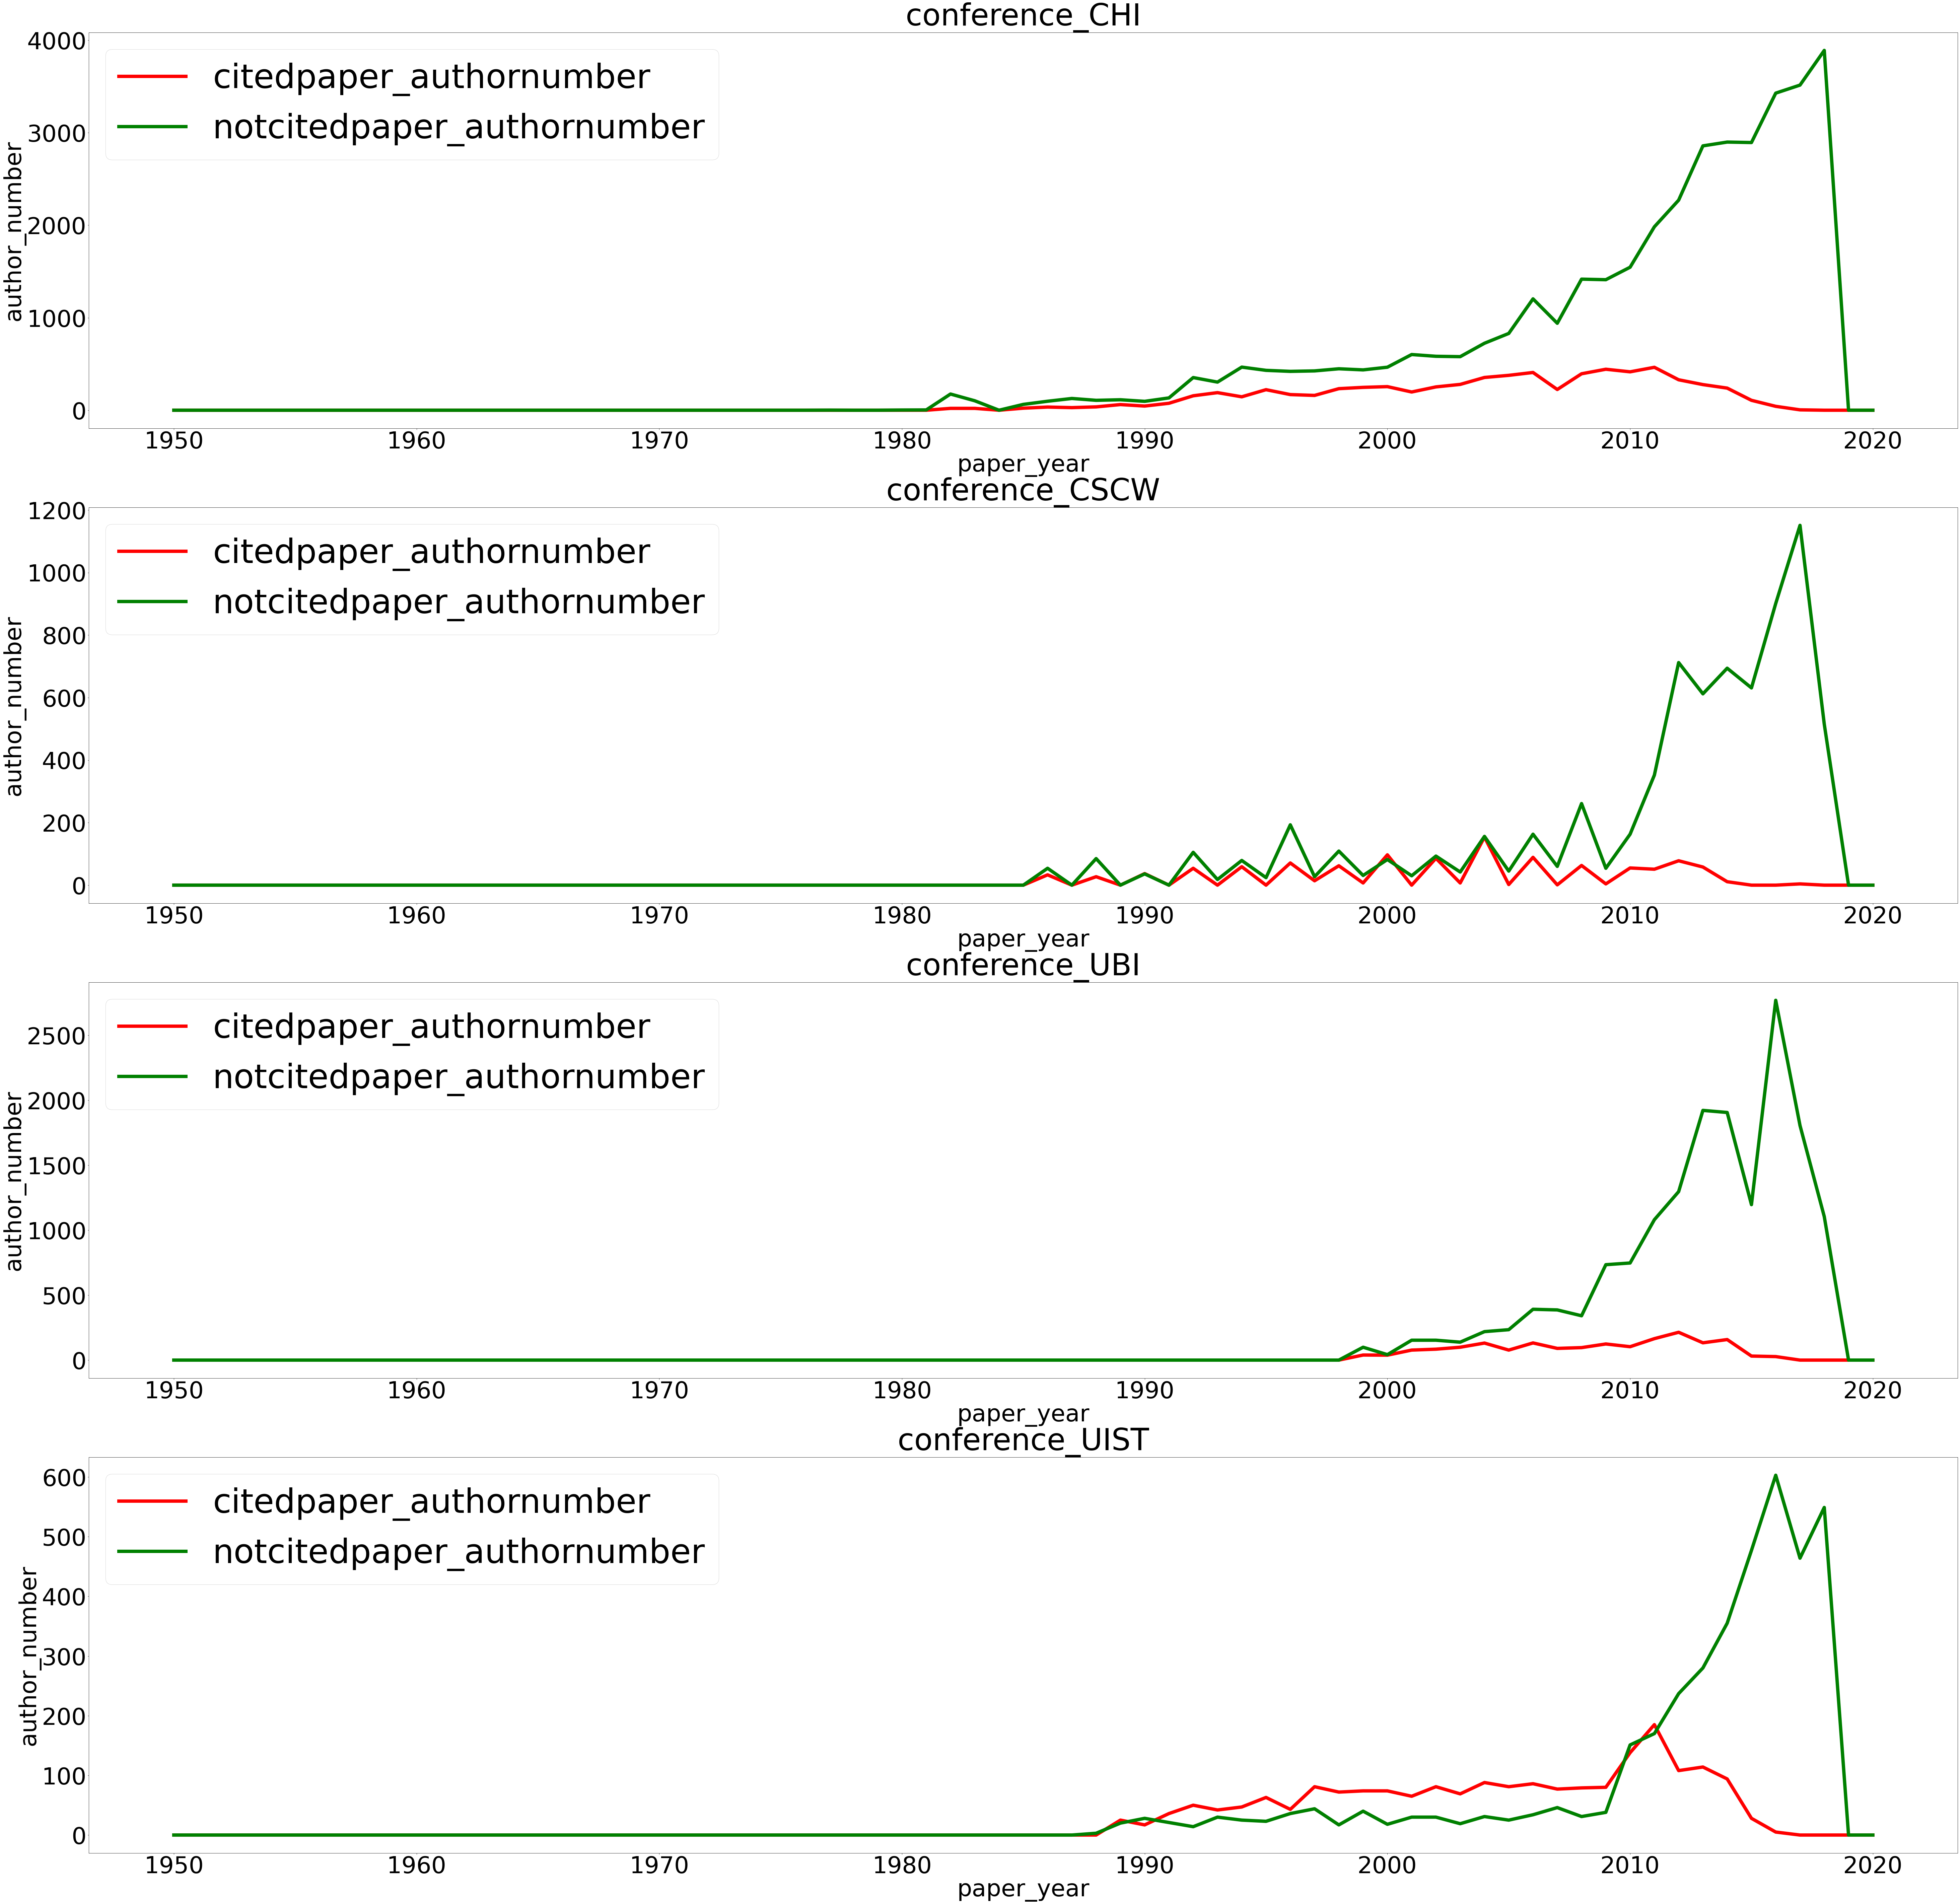

In [9]:
# Visualization
fig = plt.figure(figsize=(100,100))
axes = fig.subplots(nrows=4)

for ax_c in axes:
    ax_c.set_xlabel("paper_year", fontsize=70)
    ax_c.set_ylabel("author_number", fontsize=70)
    ax_c.tick_params(labelsize=70)

plot_idx = 0

X_year = [i for i in range (1950, 2021)]

for conf, paperyear_map in paperyear_map_conf.items():
    Y_citedpaper_authorcnt = [0] * 71
    Y_notcitedpaper_authorcnt = [0] * 71

    cited_author_map = cited_author_map_conf[conf]
    notcited_author_map = notcited_author_map_conf[conf]
    for i in range (1950, 2021):
        if str(i) in cited_author_map.keys():
            Y_citedpaper_authorcnt[i-1950] = len(cited_author_map[str(i)])    
        if str(i) in notcited_author_map.keys():
            Y_notcitedpaper_authorcnt[i-1950] = len(notcited_author_map[str(i)])    

    axes[plot_idx].plot(X_year,Y_citedpaper_authorcnt, 'o-', label='citedpaper_authornumber', color='r', linewidth = 10)
    axes[plot_idx].legend(loc = 'upper left', prop={'size': 100})
    axes[plot_idx].plot(X_year,Y_notcitedpaper_authorcnt, 'o-', label='notcitedpaper_authornumber', color='g', linewidth = 10)
    axes[plot_idx].set_title('conference_{}'.format(conf), fontsize=90)
    axes[plot_idx].legend(loc = 'upper left', prop={'size': 100})
    plot_idx += 1

In [10]:
#------------ analyze paper point -------------#
ori_citingpaper_conf = {}

df_cited = pd.read_csv('../data/papercited.tsv', usecols=[1,2])
df_paper_cited = df_cited.merge(df_paperid, left_on='citedpaperid', right_on='paperid')
# citing paper
for conf_name,conf_id in conf_key.items():
    ori_citingpaper_conf[conf_name] = df_paper_cited.loc[df_paper_cited['confid']==conf_id]
ori_citingpaper_conf['CHI'].head(5)

citingpaperid  citedpaperid     paperid      confid
0          25464    2134332471  2134332471  1163450153
1        4666531    2134332471  2134332471  1163450153
2       16009414    2134332471  2134332471  1163450153
3       17770477    2134332471  2134332471  1163450153
4       18161553    2134332471  2134332471  1163450153

In [11]:
citingpaper_map_conf = {}
for conf, df in ori_citingpaper_conf.items():
    citingpaper_map = {}
    inv_paperyear_map = inv_paperyear_map_conf[conf]
    for row in df.iterrows():
        citing_paperid = str(row[1]).split(',')[0].split('\n')[0].split()[1]
        cited_paperid = str(row[1]).split(',')[0].split('\n')[1].split()[1]
        # paperyear
        paperyear = inv_paperyear_map[cited_paperid]
        if paperyear not in citingpaper_map.keys():
            citingpaper_map[paperyear] = []
        citingpaper_map[paperyear].append(citing_paperid)
    citingpaper_map_conf[conf] = citingpaper_map
print(">>> citing paper map construction done")

>>> citing paper map construction done


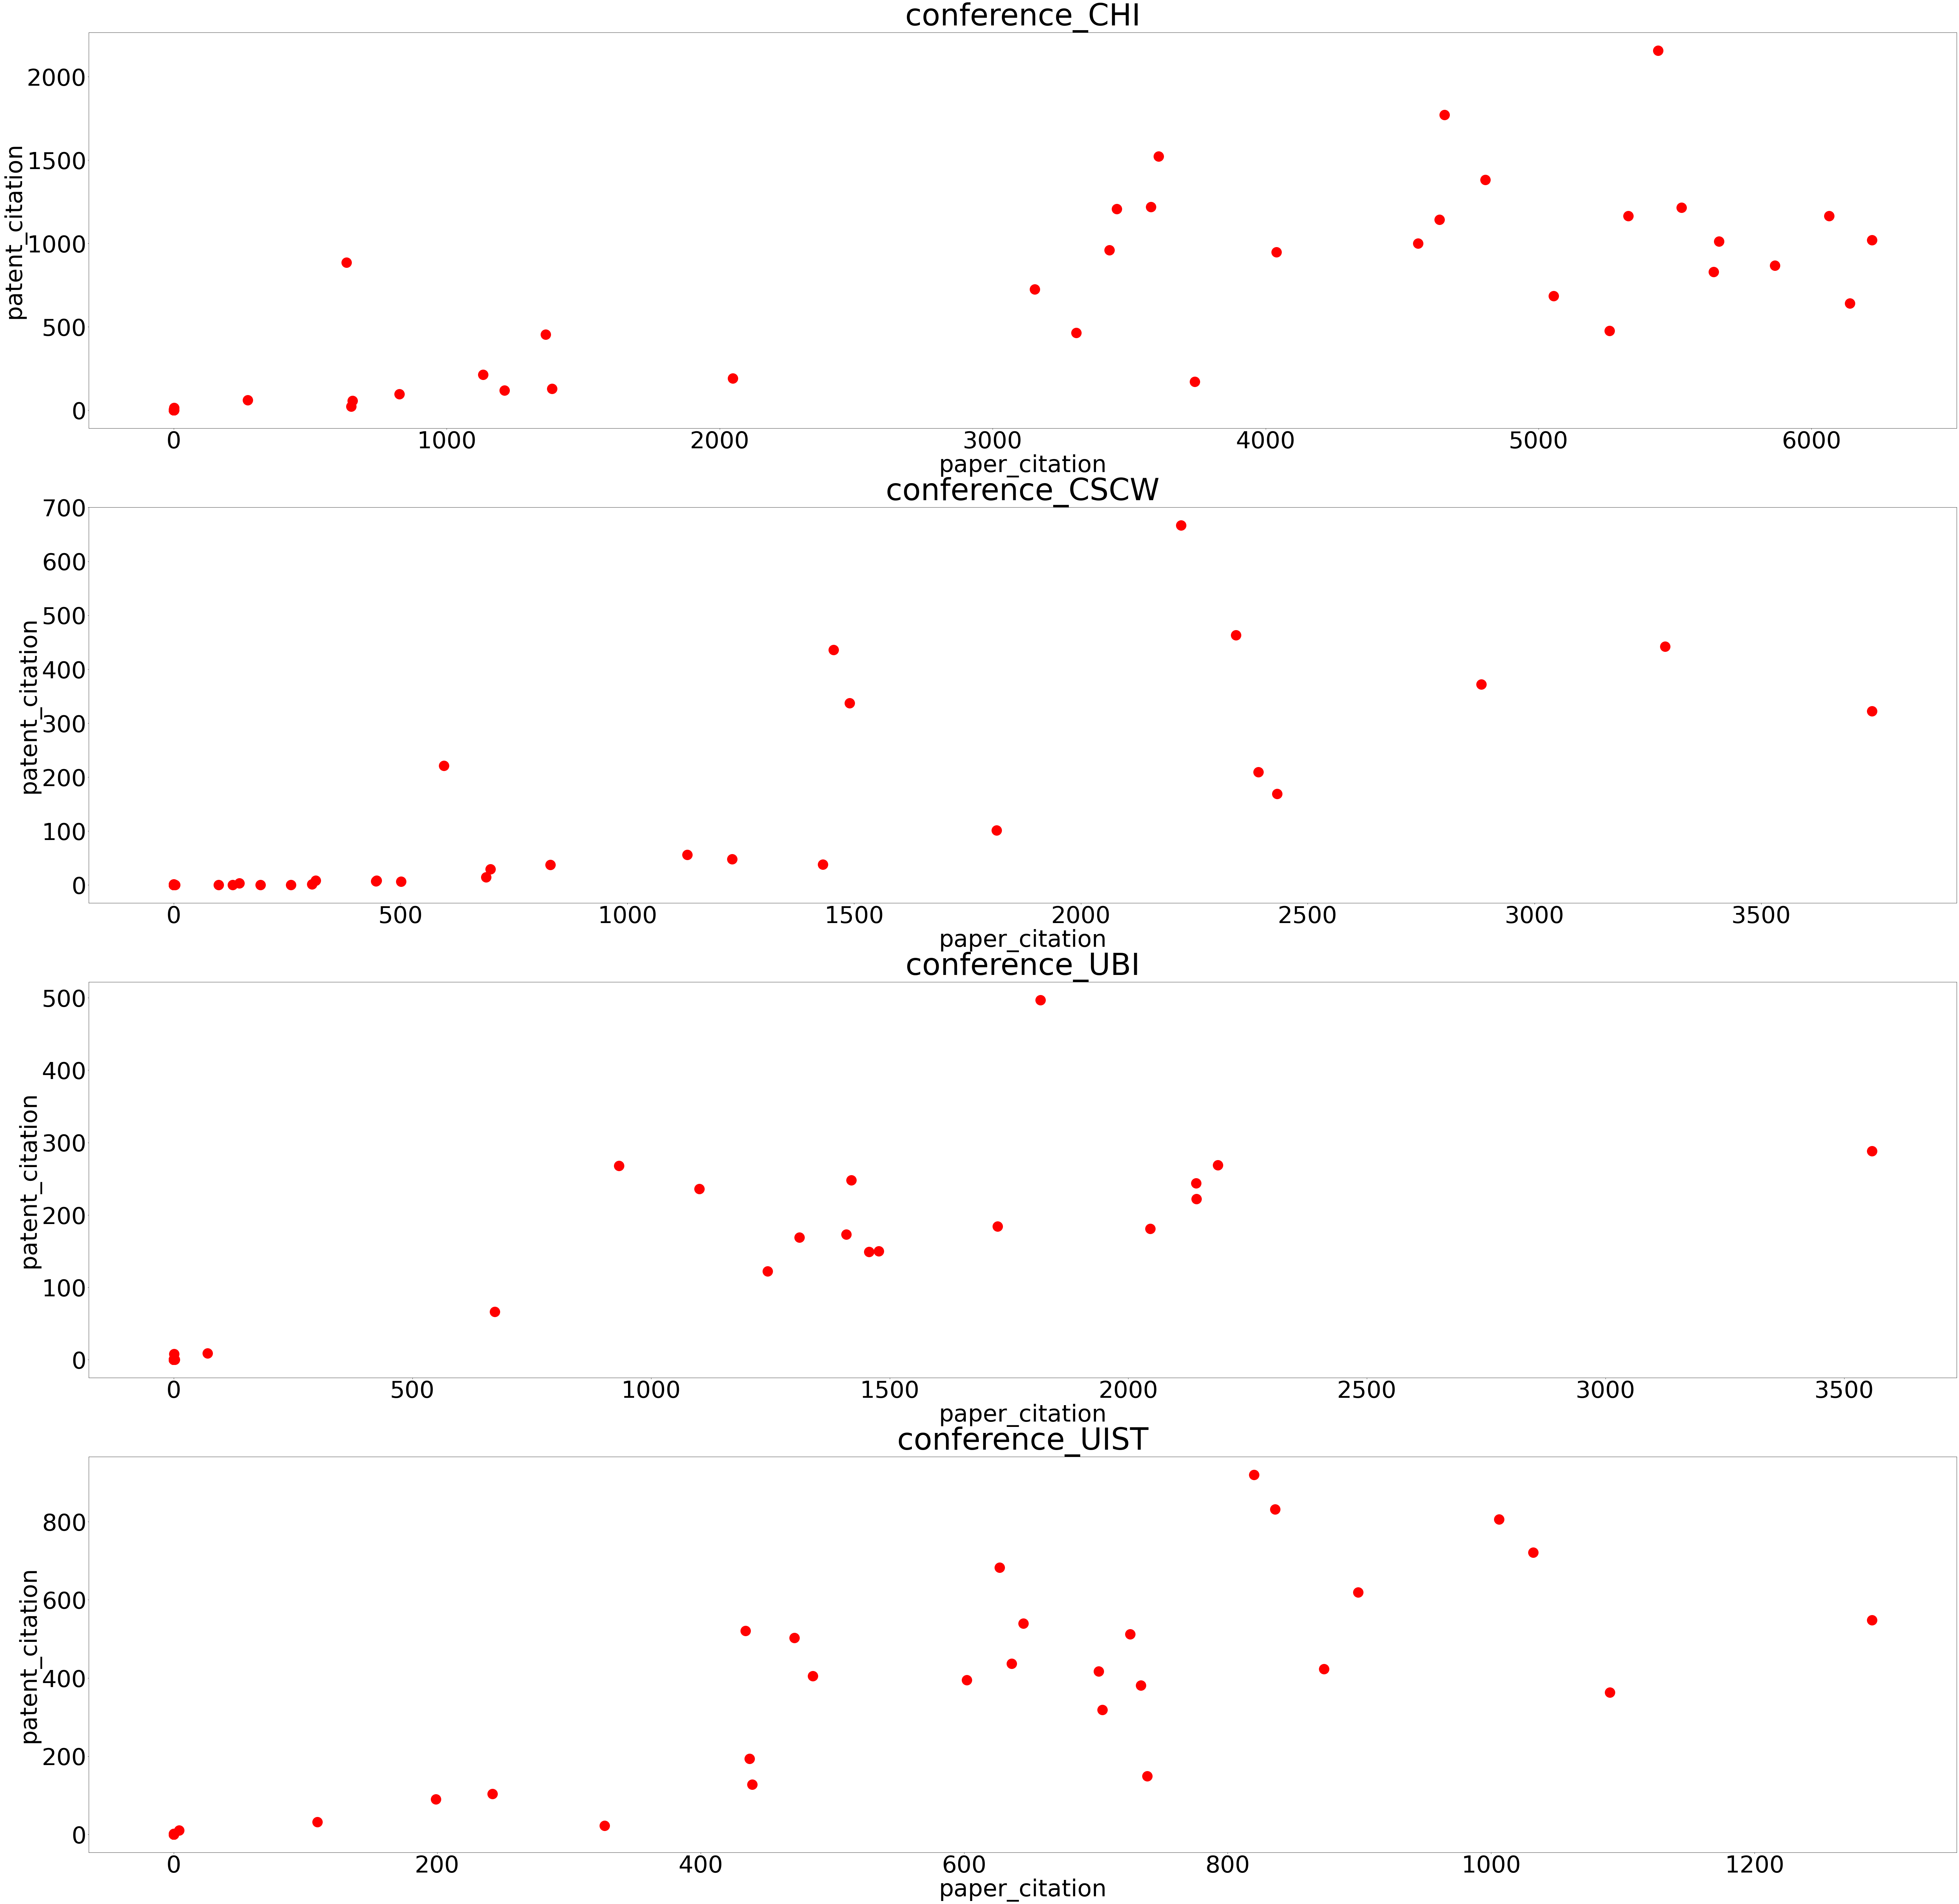

In [12]:
# point visualization
fig = plt.figure(figsize=(100,100))
axes = fig.subplots(nrows=4)

for ax_c in axes:
    ax_c.set_xlabel("paper_citation", fontsize=70)
    ax_c.set_ylabel("patent_citation", fontsize=70)
    ax_c.tick_params(labelsize=70)

plot_idx = 0

X_year = [i for i in range (1950, 2021)]

for conf, paperyear_map in paperyear_map_conf.items():
    Y_citingpatentcnt = [0] * 71
    Y_citingpapercnt = [0] * 71

    citingpatent_map = citingpatent_map_conf[conf]
    citingpaper_map = citingpaper_map_conf[conf]
    for i in range (1950, 2021):
        if str(i) in citingpatent_map.keys():
            Y_citingpatentcnt[i-1950] = len(citingpatent_map[str(i)])    
        if str(i) in citingpaper_map.keys():
            Y_citingpapercnt[i-1950] = len(citingpaper_map[str(i)])

    axes[plot_idx].plot(Y_citingpapercnt,Y_citingpatentcnt,'o',color='r',markersize=30)
    axes[plot_idx].set_title('conference_{}'.format(conf), fontsize=90)
    plot_idx += 1


In [13]:
#------------ analyze VIS4 -------------#
cited_citingpaper_map_conf = {}
notcited_citingpaper_map_conf = {}

cited_paper_map_conf = {}
notcited_paper_map_conf = {}

for conf, df in ori_citingpaper_conf.items():
    cited_citingpaper_map = {}
    notcited_citingpaper_map = {}
    cited_paper_map = {}
    notcited_paper_map = {}
    cited_paper_list = citedpaper_list_conf[conf]
    inv_paperyear_map = inv_paperyear_map_conf[conf]
    for row in df.iterrows():
        citing_paperid = str(row[1]).split(',')[0].split('\n')[0].split()[1]
        cited_paperid = str(row[1]).split(',')[0].split('\n')[1].split()[1]
        # paperyear
        paperyear = inv_paperyear_map[cited_paperid]
        if cited_paperid in cited_paper_list:
            if paperyear not in cited_citingpaper_map.keys():
                cited_citingpaper_map[paperyear] = []
            if paperyear not in cited_paper_map.keys():
                cited_paper_map[paperyear] = {}
            if cited_paperid not in cited_paper_map[paperyear].keys():
                cited_paper_map[paperyear][cited_paperid] = []
            if citing_paperid not in cited_paper_map[paperyear][cited_paperid]:
                cited_paper_map[paperyear][cited_paperid].append(citing_paperid)
            # if citing_paperid not in cited_citingpaper_map[paperyear]:
            cited_citingpaper_map[paperyear].append(citing_paperid)
        else:
            if paperyear not in notcited_citingpaper_map.keys():
                notcited_citingpaper_map[paperyear] = []
            if paperyear not in notcited_paper_map.keys():
                notcited_paper_map[paperyear] = {}
            if cited_paperid not in notcited_paper_map[paperyear].keys():
                notcited_paper_map[paperyear][cited_paperid] = []
            if citing_paperid not in notcited_paper_map[paperyear][cited_paperid]:
                notcited_paper_map[paperyear][cited_paperid].append(citing_paperid)
            # if citing_paperid not in notcited_citingpaper_map[paperyear]:
            notcited_citingpaper_map[paperyear].append(citing_paperid)
    cited_citingpaper_map_conf[conf] = cited_citingpaper_map
    notcited_citingpaper_map_conf[conf] = notcited_citingpaper_map
    cited_paper_map_conf[conf] = cited_paper_map
    notcited_paper_map_conf[conf] = notcited_paper_map
print(">>> cited paper map construction done")

>>> cited paper map construction done


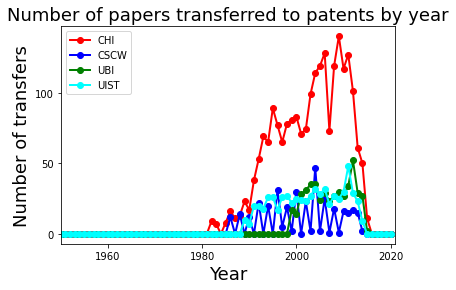

In [14]:
# Number of papers transferred to patents by year
font = {'size'   : 18}
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([1950,2021])
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Number of transfers', fontsize = 18)
plt.title('Number of papers transferred to patents by year', fontsize = 18)

color_list = ['red', 'blue', 'green', 'cyan']
idx = 0
for conf, paperyear_map in paperyear_map_conf.items():
    cited_paper_map = cited_paper_map_conf[conf]
    Y_citedpaper_cnt= [0] * 71
    for i in range (1950, 2021):
        if str(i) in cited_paper_map.keys():
            Y_citedpaper_cnt[i-1950] = len(cited_paper_map[str(i)])
    plt.plot(X_year, Y_citedpaper_cnt, 'o-', label = conf, color = color_list[idx], linewidth = 2)
    idx += 1

plt.legend(loc = 'upper left')
plt.rc('font', **font)
plt.show()

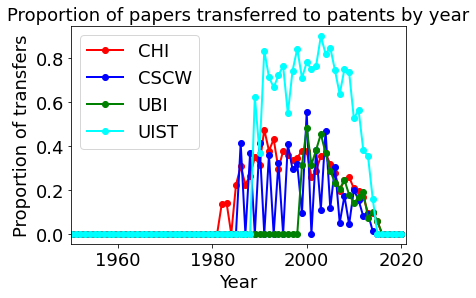

In [15]:
# proportion of papers transferred to patents by year
font = {'size'   : 18}
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([1950,2021])
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Proportion of transfers', fontsize = 18)
plt.title('Proportion of papers transferred to patents by year', fontsize = 18)

color_list = ['red', 'blue', 'green', 'cyan']
idx = 0
for conf, paperyear_map in paperyear_map_conf.items():
    cited_paper_map = cited_paper_map_conf[conf]
    notcited_paper_map = notcited_paper_map_conf[conf]
    paper_map = cited_paper_map_conf[conf]
    Y_citedpaper_cnt= [0] * 71
    for i in range (1950, 2021):
        if str(i) in cited_paper_map.keys():
            Y_citedpaper_cnt[i-1950] = len(cited_paper_map[str(i)]) / (len(cited_paper_map[str(i)]) + len(notcited_paper_map[str(i)]))
    plt.plot(X_year, Y_citedpaper_cnt, 'o-', label = conf, color = color_list[idx], linewidth = 2)
    idx += 1

plt.legend(loc = 'upper left')
plt.rc('font', **font)
plt.show()

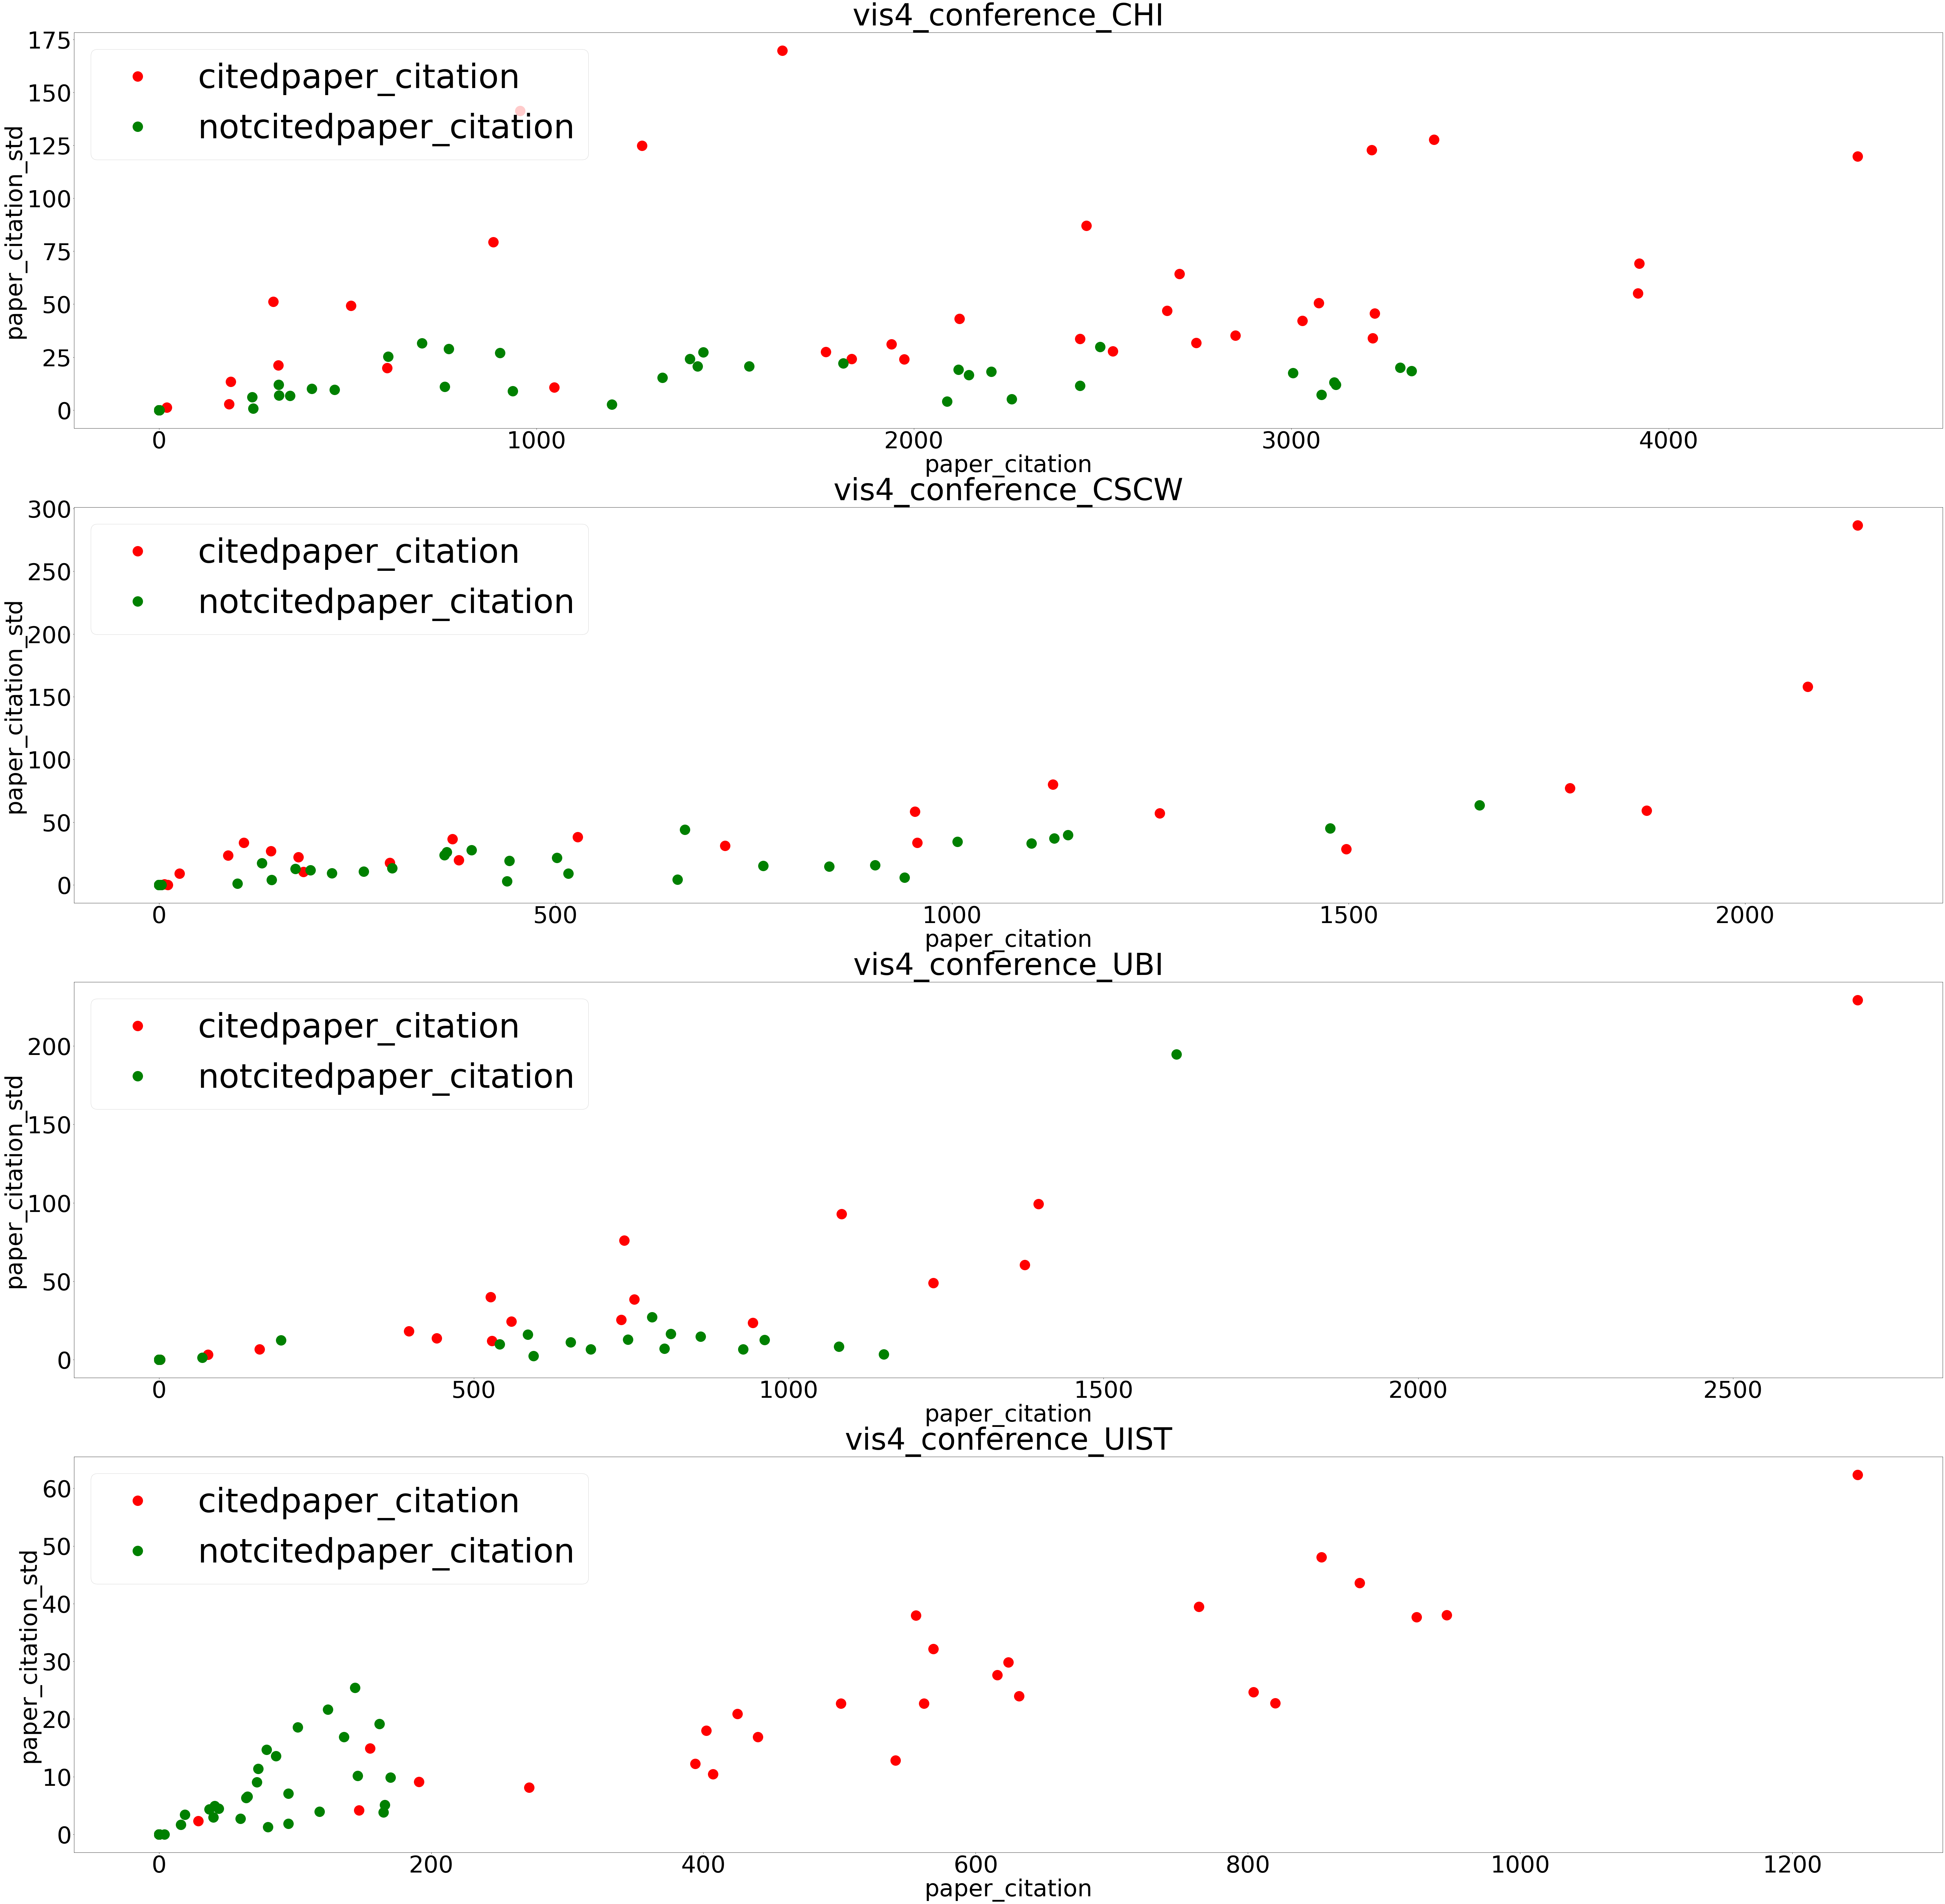

In [16]:
# visualization
X_year = [i for i in range (1950, 2021)]
fig = plt.figure(figsize=(100,100))
axes = fig.subplots(nrows=4)

for ax_c in axes:
    ax_c.set_xlabel("paper_citation", fontsize=70)
    ax_c.set_ylabel("paper_citation_std", fontsize=70)
    ax_c.tick_params(labelsize=70)

plot_idx = 0
for conf, paperyear_map in paperyear_map_conf.items():
    Y_citedpaper_citation_std = [0.0] * 71
    Y_notcitedpaper_citation_std = [0.0] * 71
    Y_citedpaper_citation_cnt= [0] * 71
    Y_notcitedpaper_citation_cnt = [0] * 71
    cited_totalcitation = 0
    notcited_totalcitation = 0

    cited_citingpaper_map = cited_citingpaper_map_conf[conf]
    notcited_citingpaper_map = notcited_citingpaper_map_conf[conf]
    cited_paper_map = cited_paper_map_conf[conf]
    notcited_paper_map = notcited_paper_map_conf[conf]
    for i in range (1950, 2021):
        if str(i) in cited_citingpaper_map.keys():
            Y_citedpaper_citation_cnt[i-1950] = len(cited_citingpaper_map[str(i)])
            cited_totalcitation += len(cited_citingpaper_map[str(i)])
        if str(i) in notcited_citingpaper_map.keys():
            Y_notcitedpaper_citation_cnt[i-1950] = len(notcited_citingpaper_map[str(i)])
            notcited_totalcitation += len(notcited_citingpaper_map[str(i)])

    for i in range (1950, 2021):
        if str(i) in cited_paper_map.keys():
            citing_list = []
            for key,val in cited_paper_map[str(i)].items():
                citing_list.append(len(val))
            # print(">>> cited conf{} list{}".format(conf, citing_list))
            Y_citedpaper_citation_std[i-1950] = np.std(citing_list)
        if str(i) in notcited_paper_map.keys():
            citing_list = []
            for key,val in notcited_paper_map[str(i)].items():
                citing_list.append(len(val))
            # print(">>> notcited conf{} list{}".format(conf, citing_list))
            Y_notcitedpaper_citation_std[i-1950] = np.std(citing_list)

    axes[plot_idx].plot(Y_citedpaper_citation_cnt,Y_citedpaper_citation_std,'o',label='citedpaper_citation',color='r',markersize=30)
    axes[plot_idx].legend(loc = 'upper left', prop={'size': 100})
    axes[plot_idx].plot(Y_notcitedpaper_citation_cnt,Y_notcitedpaper_citation_std,'o',label='notcitedpaper_citation',color='g',markersize=30)
    axes[plot_idx].legend(loc = 'upper left', prop={'size': 100})
    axes[plot_idx].set_title('vis4_conference_{}'.format(conf), fontsize=90)
    plot_idx += 1

In [17]:
single_citingpaper_map_conf = {}
for conf, df in ori_citingpaper_conf.items():
    single_citingpaper_map = {}
    for row in df.iterrows():
        citing_paperid = str(row[1]).split(',')[0].split('\n')[0].split()[1]
        cited_paperid = str(row[1]).split(',')[0].split('\n')[1].split()[1]
        if cited_paperid not in single_citingpaper_map.keys():
            single_citingpaper_map[cited_paperid] = []
        single_citingpaper_map[cited_paperid].append(citing_paperid)
    single_citingpaper_map_conf[conf] = single_citingpaper_map
print(">>> single citing paper map construction done")

>>> single citing paper map construction done


In [18]:
single_citingpatent_map_conf = {}
for conf, df in ori_citingpatent_conf.items():
    single_citingpatent_map = {}
    for row in df.iterrows():
        paperid = str(row[1]).split(',')[0].split('\n')[0].split()[1] # paperid
        patentid = str(row[1]).split(',')[0].split('\n')[1].split()[1] # patentid

        if paperid not in single_citingpatent_map.keys():
            single_citingpatent_map[paperid] = []
        single_citingpatent_map[paperid].append(patentid)

    single_citingpatent_map_conf[conf] = single_citingpatent_map
print(">>> done single citing data")

>>> done single citing data


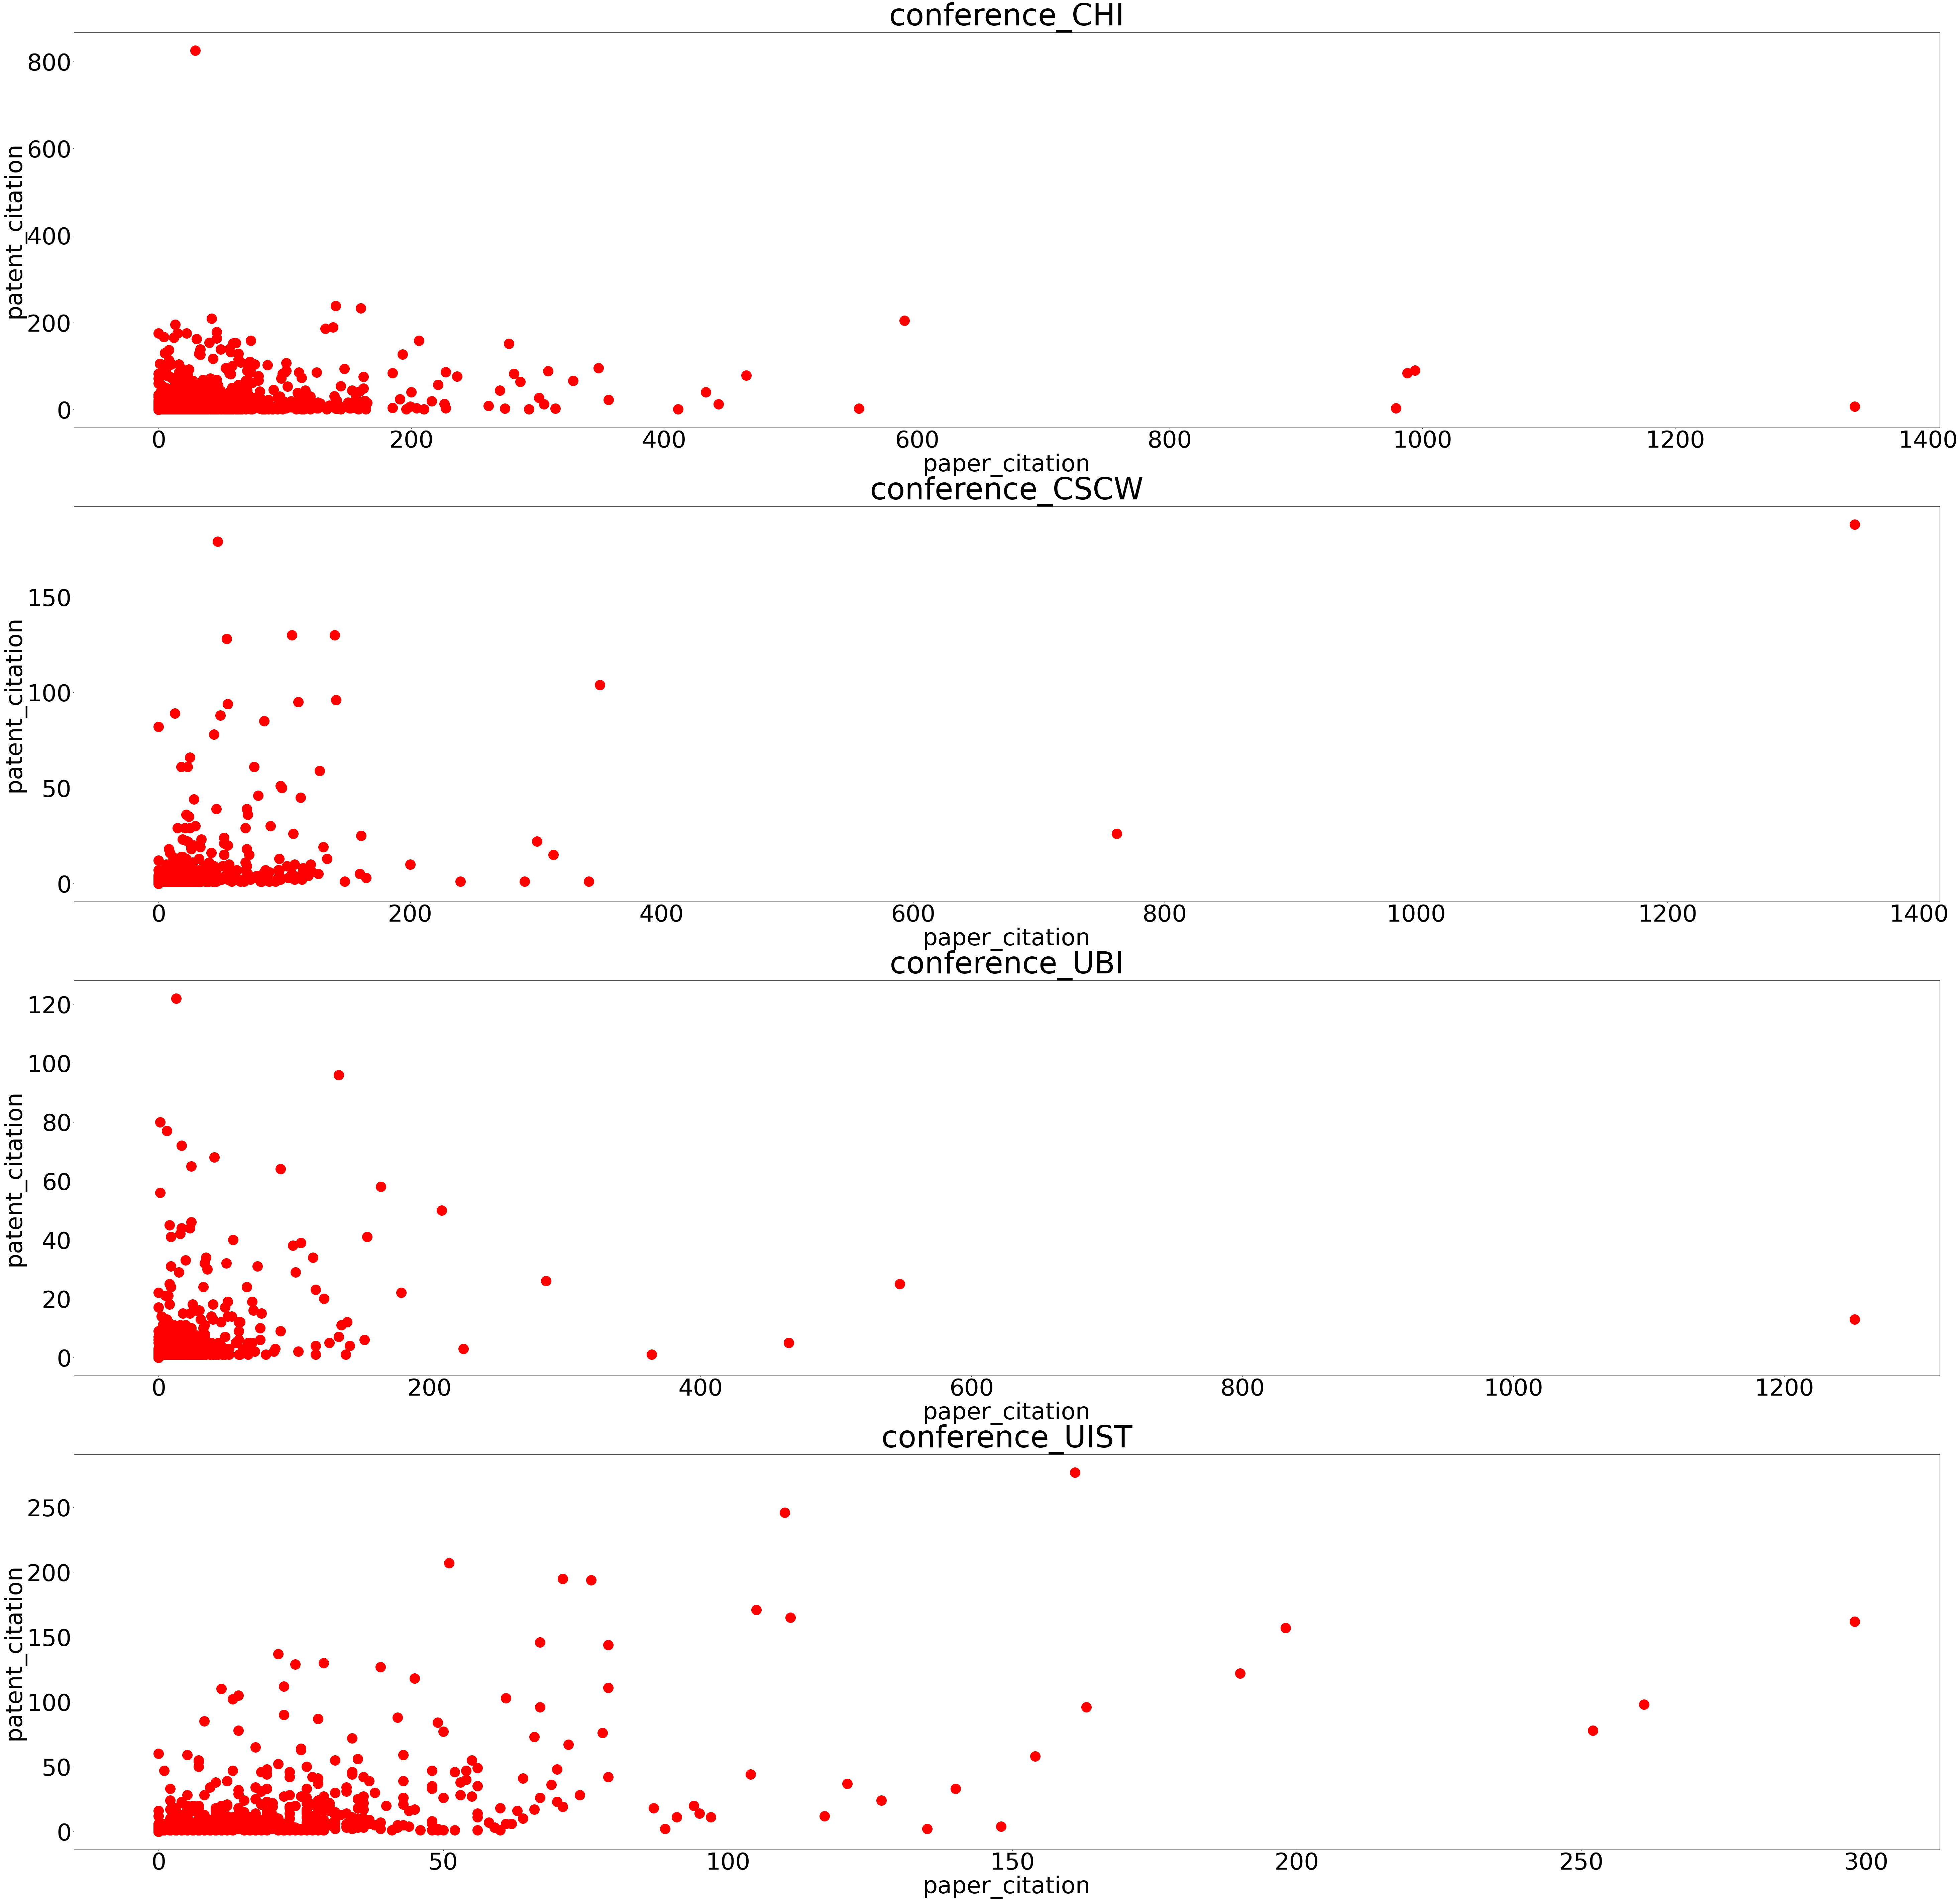

In [19]:
# single point visualization
fig = plt.figure(figsize=(100,100))
axes = fig.subplots(nrows=4)

for ax_c in axes:
    ax_c.set_xlabel("paper_citation", fontsize=70)
    ax_c.set_ylabel("patent_citation", fontsize=70)
    ax_c.tick_params(labelsize=70)

plot_idx = 0

for conf, paperyear_map in paperyear_map_conf.items():
    citingpatent_map = single_citingpatent_map_conf[conf]
    citingpaper_map = single_citingpaper_map_conf[conf]
    Y_citingpatentcnt = [0] * max(len(citingpatent_map), len(citingpaper_map))
    Y_citingpapercnt = [0] * max(len(citingpatent_map), len(citingpaper_map))
    idx = 0
    for key, val in citingpatent_map.items():
        Y_citingpatentcnt[idx] = len(val)
        if key in citingpaper_map:
            Y_citingpapercnt[idx] = len(citingpaper_map[key])
        else:
             Y_citingpapercnt[idx] = 0
        idx += 1
    axes[plot_idx].plot(Y_citingpapercnt,Y_citingpatentcnt,'o',color='r',markersize=30)
    axes[plot_idx].set_title('conference_{}'.format(conf), fontsize=90)
    plot_idx += 1


In [20]:
import seaborn as sns
df_patent_year = pd.read_csv('../data/patent_year_inventor.tsv', usecols=[2,5,10])
df_patent_year = df_patent_year.drop_duplicates()
df_patent_year['patent_year'] = pd.DatetimeIndex(df_patent_year['date']).year
df_patent_year['patent_id'] = df_patent_year['patent_id'].apply(str)
df_patent_paper_year = df_patent_year.merge(df_paper_pc2s_year,left_on='patent_id',right_on='patent')
df_patent_paper_year['patent_paper_lag'] = df_patent_paper_year['patent_year'] - df_patent_paper_year['year']
df_patent_paper_year.head(10)

patent_id conf_id        date  patent_year     paperid   patent      confid  \
0   9589072    CSCW  2017-03-07         2017  2083973186  9589072  1195049314   
1   7752235    CSCW  2010-07-06         2010  1988816896  7752235  1195049314   
2   9641609    CSCW  2017-05-02         2017  1973263916  9641609  1195049314   
3   7130885    CSCW  2006-10-31         2006  2116678925  7130885  1195049314   
4   7243130    CSCW  2007-07-10         2007  2030445730  7243130  1195049314   
5   5103444    CSCW  1992-04-07         1992  2085540333  5103444  1195049314   
6   7962853    CSCW  2011-06-14         2011  2072040293  7962853  1195049314   
7   7962853    CSCW  2011-06-14         2011  2072040293  7962853  1195049314   
8   6408336    CSCW  2002-06-18         2002  2058049109  6408336  1195049314   
9   6408336    CSCW  2002-06-18         2002  2124470457  6408336  1195049314   

   year  patent_paper_lag  
0  2000                17  
1  2000                10  
2  2004                13  
3  1992                14  
4  1996                11  
5  1986                 6  
6  2002                 9  
7  2002                 9  
8  1992                10  
9  1996                 6

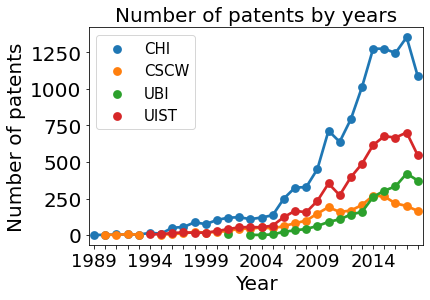

In [21]:
# related patents over year
df_temp = df_patent_paper_year.groupby(['conf_id','patent_id','patent_year']).agg('count').reset_index()
df_temp = df_temp[['conf_id','patent_id','patent_year']]
df_temp = df_temp.groupby(['conf_id','patent_year']).agg('count').reset_index()


df_temp = df_temp[df_temp['patent_year']>1985]
plt_ = sns.pointplot(x="patent_year", y="patent_id", hue="conf_id", data=df_temp)
plt.ylabel('Number of patents',fontsize = 20)
plt.title('Number of patents by years',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.legend(fontsize =15)
plt.xlabel('Year', fontsize =20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

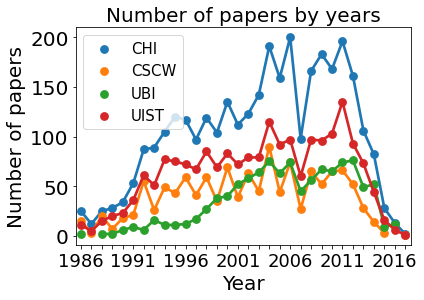

In [22]:
# related patents over year
df_temp = df_patent_paper_year.groupby(['conf_id','paperid','year']).agg('count').reset_index()
df_temp = df_temp[['conf_id','paperid','year']]
df_temp = df_temp.groupby(['conf_id','year']).agg('count').reset_index()


df_temp = df_temp[df_temp['year']>1985]
plt_ = sns.pointplot(x="year", y="paperid", hue="conf_id", data=df_temp)
plt.ylabel('Number of papers',fontsize = 20)
plt.title('Number of papers by years',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.xlabel('Year', fontsize = 20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

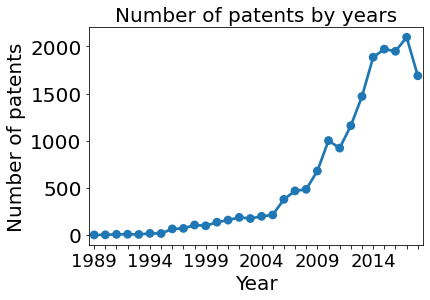

In [23]:
# related patents over year
df_temp = df_patent_paper_year.groupby(['patent_id','patent_year']).agg('count').reset_index()
df_temp = df_temp[['patent_id','patent_year']]
df_temp = df_temp.groupby(['patent_year']).agg('count').reset_index()


df_temp = df_temp[df_temp['patent_year']>1985]
plt_ = sns.pointplot(x="patent_year", y="patent_id", data=df_temp)
plt.ylabel('Number of patents',fontsize = 20)
plt.title('Number of patents by years',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
#plt.legend(fontsize =15)
plt.xlabel('Year', fontsize =20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [24]:
subfield_list = ['HCI']
df_category = pd.read_csv("../data/category.tsv")
transfer_year = []
for subfield in subfield_list:
    df_temp = df_patent_paper_year[df_patent_paper_year['conf_id'].isin(df_category.loc[df_category['subfield']==subfield]['conf_name'].tolist())]
    print("sunfield {} mean papaer to patent transfer time".format(subfield))
    print(np.mean(list(df_temp['patent_paper_lag'])))
    transfer_year.append(np.mean(list(df_temp['patent_paper_lag'])))

sunfield HCI mean papaer to patent transfer time
14.114575998390505


In [25]:
conf_list = ['CHI','CSCW','UBI','UIST']
df_category = pd.read_csv("../data/category.tsv")
transfer_year = []
for conf in conf_list:
    df_temp = df_patent_paper_year[df_patent_paper_year['conf_id']==conf]
    print("conference {} mean papaer to patent transfer time".format(conf))
    print(np.mean(list(df_temp['patent_paper_lag'])))
    transfer_year.append(np.mean(list(df_temp['patent_paper_lag'])))

conference CHI mean papaer to patent transfer time
13.87880813143971
conference CSCW mean papaer to patent transfer time
16.452200856648137
conference UBI mean papaer to patent transfer time
11.189611840268082
conference UIST mean papaer to patent transfer time
14.262292508731312


Text(0.5, 0, '')

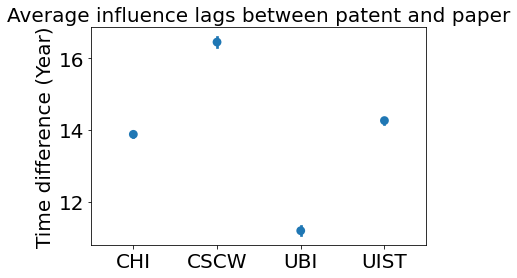

In [26]:
# the average lag of science that influence patent
sns.pointplot(x="conf_id", y="patent_paper_lag", data=df_patent_paper_year, order = ['CHI','CSCW','UBI','UIST'], join=False)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('Average influence lags between patent and paper',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('')

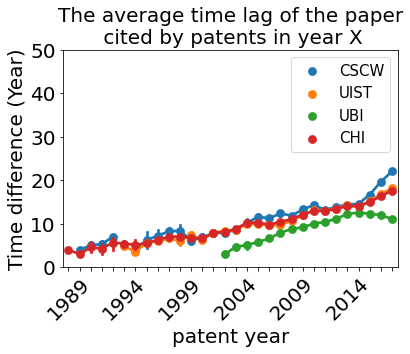

In [28]:
# the average lag of science that influence patent
df_temp = df_patent_paper_year[df_patent_paper_year['patent_year']>1985]
plt_ = sns.pointplot(x="patent_year", y="patent_paper_lag", hue="conf_id", data=df_temp)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('The average time lag of the paper\n cited by patents in year X',fontsize = 20)
plt.xticks(rotation=45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim(0, 50)
plt.legend(fontsize =15)
plt.xlabel('patent year', fontsize =20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


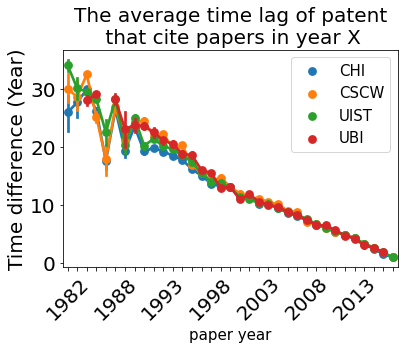

In [30]:
# the average lag of science that influence patent
df_temp = df_patent_paper_year.sort_values('year', ascending = False).reset_index(drop=True)
df_temp = df_temp[df_temp['year']>1977]
plt_ = sns.pointplot(x="year", y="patent_paper_lag", hue="conf_id", data=df_temp)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('The average time lag of patent\n that cite papers in year X',fontsize = 20)
plt.xticks(rotation=90)
plt.xticks(rotation=45, fontsize = 20)
plt.legend(fontsize =15)
plt.xlabel('paper year', fontsize =15)
plt.yticks(fontsize = 20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

Text(0.5, 0, '')

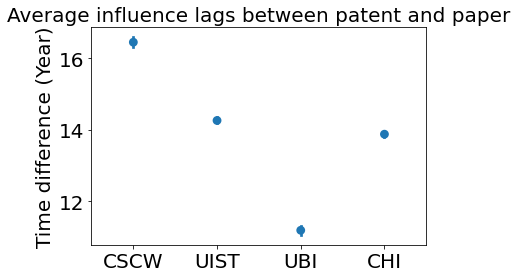

In [31]:
# the average lag of science that influence patent
sns.pointplot(x="conf_id", y="patent_paper_lag", data=df_patent_paper_year, join=False)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('Average influence lags between patent and paper',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('')

Text(0.5, 0, '')

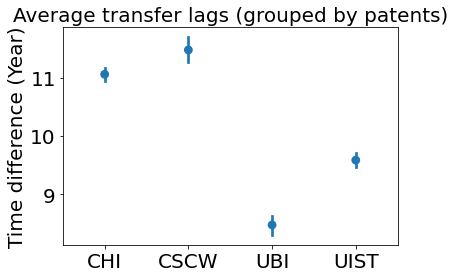

In [32]:
# the time lag of newest paper in a patent
df_temp = df_patent_paper_year.groupby(['patent_id','patent_year','conf_id'])['patent_paper_lag'].agg('min').reset_index()
sns.pointplot(x="conf_id", y="patent_paper_lag", data=df_temp, order = ['CHI','CSCW','UBI','UIST'], join=False)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('Average transfer lags (grouped by patents)',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('')

Text(0.5, 0, '')

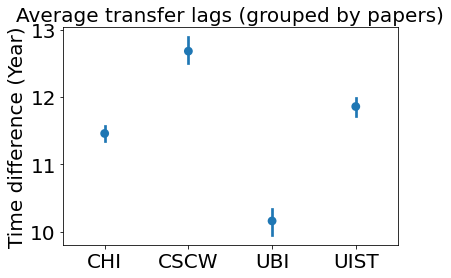

In [33]:
# the time lag of paper to newest patent
df_temp = df_patent_paper_year.groupby(['paperid','patent_year','conf_id'])['patent_paper_lag'].agg('min').reset_index()
sns.pointplot(x="conf_id", y="patent_paper_lag", data=df_temp, order = ['CHI','CSCW','UBI','UIST'], join=False)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('Average transfer lags (grouped by papers)',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('')

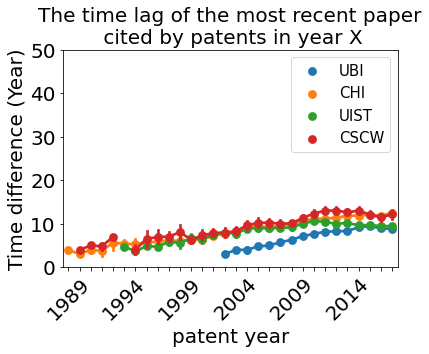

In [35]:
# the time lag of newest paper in a patent
df_temp = df_patent_paper_year.groupby(['patent_id','patent_year','conf_id'])['patent_paper_lag'].agg('min').reset_index()
df_temp = df_temp[df_temp['patent_year']>1985]
plt_ = sns.pointplot(x="patent_year", y="patent_paper_lag", hue="conf_id", data=df_temp)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('The time lag of the most recent paper\n cited by patents in year X',fontsize = 20)
plt.xticks(rotation=45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim(0, 50)
plt.legend(fontsize =15)
plt.xlabel('patent year', fontsize =20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

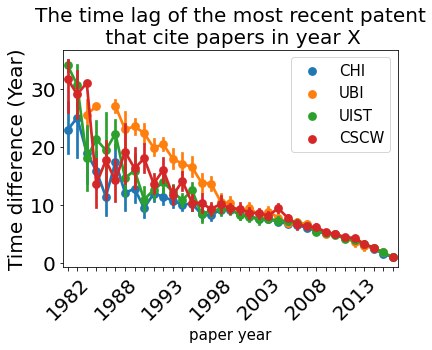

In [36]:
# the first patent that adopts a paper
df_temp = df_patent_paper_year.groupby(['paperid','year',"conf_id"])['patent_paper_lag'].agg('min').reset_index()
df_temp = df_temp[df_temp['year']>1977]
plt_ = sns.pointplot(x="year", y="patent_paper_lag", hue="conf_id", data=df_temp)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('The time lag of the most recent patent\n that cite papers in year X',fontsize = 20)
plt.xticks(rotation=45, fontsize = 20)
plt.legend(fontsize =15)
plt.xlabel('paper year', fontsize =15)
plt.yticks(fontsize = 20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

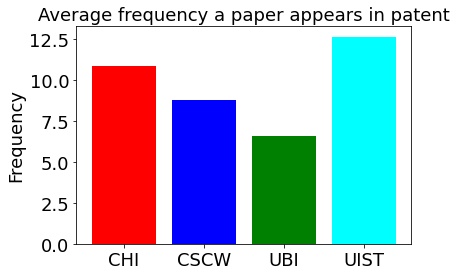

In [37]:
## Plot aggregate average times a paper gets transferred to patents 
## Only consider papers that get transferred
patent_CHI_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="CHI"].groupby(['year','paperid'])['patent_id'].count()}).reset_index()
patent_CSCW_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="CSCW"].groupby(['year','paperid'])['patent_id'].count()}).reset_index()
patent_UBI_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="UBI"].groupby(['year','paperid'])['patent_id'].count()}).reset_index()
patent_UIST_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="UIST"].groupby(['year','paperid'])['patent_id'].count()}).reset_index()
f_CHI = patent_CHI_year['count'].sum()/len(patent_CHI_year[patent_CHI_year['count']>0])
f_CSCW = patent_CSCW_year['count'].sum()/len(patent_CSCW_year[patent_CSCW_year['count']>0])
f_UBI = patent_UBI_year['count'].sum()/len(patent_UBI_year[patent_UBI_year['count']>0])
f_UIST = patent_UIST_year['count'].sum()/len(patent_UIST_year[patent_UIST_year['count']>0])

prop = [f_CHI, f_CSCW, f_UBI, f_UIST]
bars = ('CHI', 'CSCW', 'UBI', 'UIST')
plt.bar(bars, prop, color=['red', 'blue', 'green', 'cyan'])
plt.title('Average frequency a paper appears in patent', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.rc('font', **font)

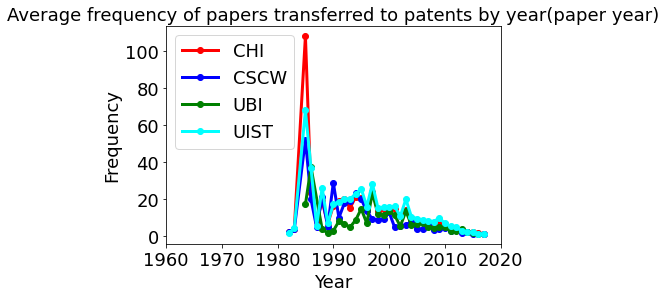

In [38]:
## Plot aggregate average number of times a paper gets transferred to patents per year 
f_CHI_year = patent_CHI_year[patent_CHI_year['count']>0].groupby('year')['count'].sum()/ patent_CHI_year[patent_CHI_year['count']>0].groupby('year')['count'].count()
f_CSCW_year = patent_CSCW_year[patent_CSCW_year['count']>0].groupby('year')['count'].sum()/ patent_CSCW_year[patent_CSCW_year['count']>0].groupby('year')['count'].count()
f_UBI_year = patent_UBI_year[patent_UBI_year['count']>0].groupby('year')['count'].sum()/ patent_UBI_year[patent_UBI_year['count']>0].groupby('year')['count'].count()
f_UIST_year = patent_UIST_year[patent_UIST_year['count']>0].groupby('year')['count'].sum()/ patent_UIST_year[patent_UIST_year['count']>0].groupby('year')['count'].count()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([1960,2020])
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.title('Average frequency of papers transferred to patents by year(paper year)', fontsize = 18)
plt.plot(f_CHI_year.index, f_CHI_year, 'o-', label = 'CHI', color = 'red', linewidth = 3)
plt.plot(f_CSCW_year.index, f_CSCW_year, 'o-', label = 'CSCW', color = 'blue', linewidth = 3)
plt.plot(f_UBI_year.index, f_UBI_year, 'o-', label = 'UBI', color = 'green', linewidth = 3)
plt.plot(f_UIST_year.index, f_UIST_year, 'o-', label = 'UIST', color = 'cyan', linewidth = 3)
plt.legend(loc = 'upper left')
plt.rc('font', **font)
plt.show()


In [39]:
patent_CHI_year[patent_CHI_year['count'] > 200]

year     paperid  count
18    1985  1967451823    809
47    1986  2161581092    201
270   1992  2118580158    227
773   1997  2070073484    209
1093  2000  2043747172    233

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of CHI paper transfer frequency')

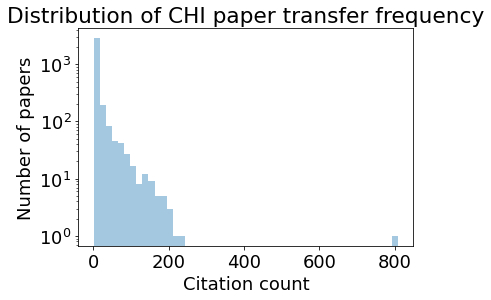

In [40]:
patent_CHI_freq = patent_CHI_year
sns.distplot(patent_CHI_freq['count'],kde=False)
plt.yscale('log')
plt.xlabel('Citation count', fontsize = 18)
plt.ylabel('Number of papers', fontsize = 18)
plt.title('Distribution of CHI paper transfer frequency')

Text(0.5, 1.0, 'Distribution of CSCW paper transfer frequency')

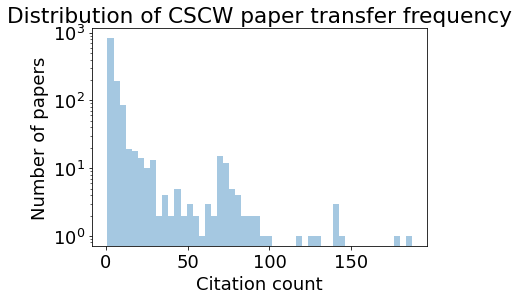

In [41]:
patent_CSCW_freq = patent_CSCW_year
sns.distplot(patent_CSCW_freq['count'],kde=False)
plt.yscale('log')
plt.xlabel('Citation count', fontsize = 18)
plt.ylabel('Number of papers', fontsize = 18)
plt.title('Distribution of CSCW paper transfer frequency')

Text(0.5, 1.0, 'Distribution of UBI paper transfer frequency')

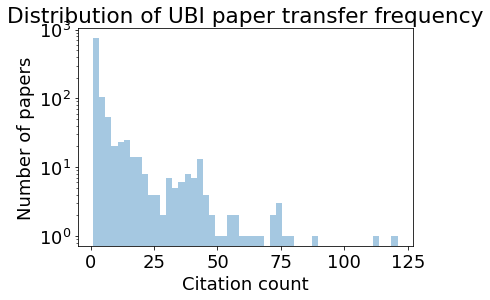

In [42]:
patent_UBI_freq = patent_UBI_year
sns.distplot(patent_UBI_freq['count'],kde=False)
plt.yscale('log')
plt.xlabel('Citation count', fontsize = 18)
plt.ylabel('Number of papers', fontsize = 18)
plt.title('Distribution of UBI paper transfer frequency')

Text(0.5, 1.0, 'Distribution of UIST paper transfer frequency')

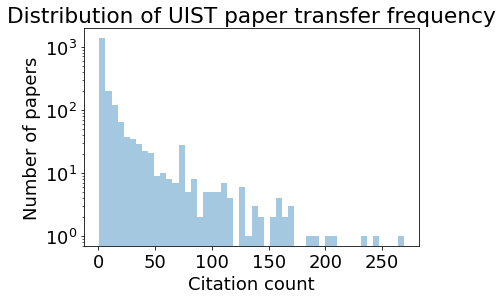

In [43]:
patent_UIST_freq = patent_UIST_year
sns.distplot(patent_UIST_freq['count'],kde=False)
plt.yscale('log')
plt.xlabel('Citation count', fontsize = 18)
plt.ylabel('Number of papers', fontsize = 18)
plt.title('Distribution of UIST paper transfer frequency')

In [164]:
df_patent_paper_year.head(10)
# df_tmp = df_patent_paper_year[(df_patent_paper_year['patent_year'] == 2000) | (df_patent_paper_year['patent_year'] == 2000)]
# df_tmp.shape[0]
# df_tmp.drop_duplicates(['paperid']).shape[0]

patent_id conf_id        date  patent_year     paperid   patent      confid  \
0   9589072    CSCW  2017-03-07         2017  2083973186  9589072  1195049314   
1   7752235    CSCW  2010-07-06         2010  1988816896  7752235  1195049314   
2   9641609    CSCW  2017-05-02         2017  1973263916  9641609  1195049314   
3   7130885    CSCW  2006-10-31         2006  2116678925  7130885  1195049314   
4   7243130    CSCW  2007-07-10         2007  2030445730  7243130  1195049314   
5   5103444    CSCW  1992-04-07         1992  2085540333  5103444  1195049314   
6   7962853    CSCW  2011-06-14         2011  2072040293  7962853  1195049314   
7   7962853    CSCW  2011-06-14         2011  2072040293  7962853  1195049314   
8   6408336    CSCW  2002-06-18         2002  2058049109  6408336  1195049314   
9   6408336    CSCW  2002-06-18         2002  2124470457  6408336  1195049314   

   year  patent_paper_lag  paper_age  
0  2000                17         17  
1  2000                10         10  
2  2004                13         13  
3  1992                14         14  
4  1996                11         11  
5  1986                 6          6  
6  2002                 9          9  
7  2002                 9          9  
8  1992                10         10  
9  1996                 6          6

[[1.         1.         1.         ... 0.86851776 0.86585248 1.        ]
 [1.         1.         1.         ... 0.86851776 0.86585248 1.        ]
 [1.         1.         1.         ... 0.86851776 0.86585248 1.        ]
 ...
 [0.86851776 0.86851776 0.86851776 ... 0.86851776 0.90377626 0.86851776]
 [0.86585248 0.86585248 0.86585248 ... 0.90377626 0.86585248 0.86585248]
 [1.         1.         1.         ... 0.86851776 0.86585248 1.        ]]


<AxesSubplot:>

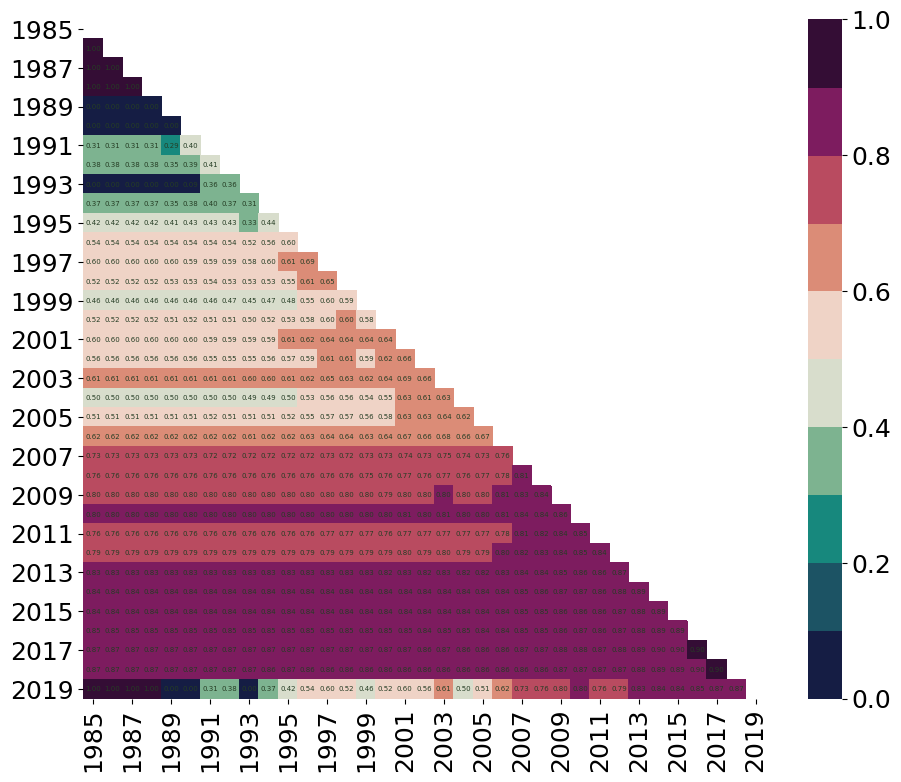

In [157]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import palettable

year_data = np.random.random((35,35))
for year_x in range(1985,2020):
    for year_y in range(1985,2020):
        df_tmp = df_patent_paper_year[(df_patent_paper_year['patent_year'] == year_x) | (df_patent_paper_year['patent_year'] == year_y)]
        all_cnt = df_tmp.shape[0]
        dedup_cnt = df_tmp.drop_duplicates(['paperid']).shape[0]
        if all_cnt ==0: all_cnt += 1
        year_data[year_x-1985][year_y-1985] = (all_cnt - dedup_cnt) / (all_cnt)

print(year_data)

x_tick=[year for year in range(1985,2020)]
y_tick=[year for year in range(1985,2020)]
dcorr=pd.DataFrame(year_data,index=y_tick,columns=x_tick)

# plt.figure(figsize=(11, 9),dpi=100)
# sns.heatmap(data=dcorr,
#             vmax=1, 
#             cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,
#             annot=True,#图中数字文本显示
#             fmt=".2f",#格式化输出图中数字，即保留小数位数等
#             annot_kws={'size':5,'weight':'normal', 'color':'#253D24'},#数字属性设置，例如字号、磅值、颜色            
#            )
# mask显示
plt.figure(figsize=(11, 9),dpi=100)
sns.heatmap(data=dcorr,
            vmax=1, 
            cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,
            annot=True,
            fmt=".2f",
            annot_kws={'size':5,'weight':'normal', 'color':'#253D24'},
            mask=np.triu(np.ones_like(dcorr,dtype=np.bool))#显示对脚线下面部分图
           )

[[0.95103611 0.95103611 0.95103611 ... 0.90377626 0.86585248 1.        ]
 [0.95103611 0.95103611 0.95103611 ... 0.90377626 0.86585248 1.        ]
 [0.95103611 0.95103611 0.95103611 ... 0.90377626 0.86585248 1.        ]
 ...
 [0.95103611 0.95103611 0.95103611 ... 0.95103611 0.95103611 0.9479707 ]
 [0.95103611 0.95103611 0.95103611 ... 0.95103611 0.95103611 0.95103611]
 [0.95103611 0.95103611 0.95103611 ... 0.95103611 0.95103611 0.95103611]]


<AxesSubplot:>

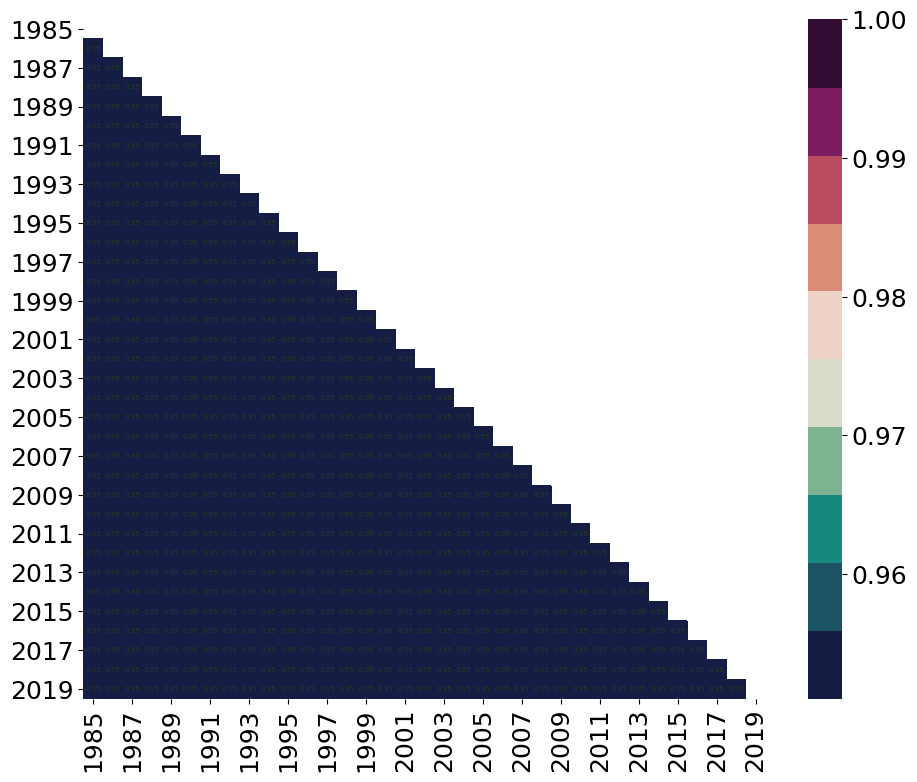

In [159]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import palettable

year_data = np.random.random((35,35))
for year_x in range(1985,2020):
    for year_y in range(1985,2020):
        df_tmp = df_patent_paper_year[(df_patent_paper_year['patent_year'] <= year_x) | (df_patent_paper_year['patent_year'] >= year_y)]
        all_cnt = df_tmp.shape[0]
        dedup_cnt = df_tmp.drop_duplicates(['paperid']).shape[0]
        if all_cnt ==0: all_cnt += 1
        year_data[year_x-1985][year_y-1985] = (all_cnt - dedup_cnt) / (all_cnt)

print(year_data)

x_tick=[year for year in range(1985,2020)]
y_tick=[year for year in range(1985,2020)]
dcorr=pd.DataFrame(year_data,index=y_tick,columns=x_tick)

# plt.figure(figsize=(11, 9),dpi=100)
# sns.heatmap(data=dcorr,
#             vmax=1, 
#             cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,
#             annot=True,#图中数字文本显示
#             fmt=".2f",#格式化输出图中数字，即保留小数位数等
#             annot_kws={'size':5,'weight':'normal', 'color':'#253D24'},#数字属性设置，例如字号、磅值、颜色            
#            )
# mask显示
plt.figure(figsize=(11, 9),dpi=100)
sns.heatmap(data=dcorr,
            vmax=1, 
            cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,
            annot=True,
            fmt=".2f",
            annot_kws={'size':5,'weight':'normal', 'color':'#253D24'},
            mask=np.triu(np.ones_like(dcorr,dtype=np.bool))#显示对脚线下面部分图
           )

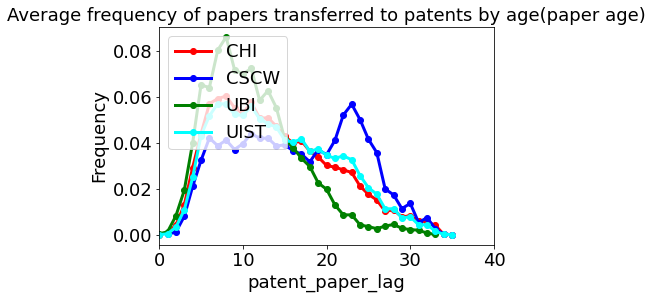

In [175]:
## Plot aggregate average number of times a paper gets transferred to patents per year
patent_CHI_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="CHI"].groupby(['patent_paper_lag','paperid'])['patent_id'].count()}).reset_index()
patent_CSCW_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="CSCW"].groupby(['patent_paper_lag','paperid'])['patent_id'].count()}).reset_index()
patent_UBI_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="UBI"].groupby(['patent_paper_lag','paperid'])['patent_id'].count()}).reset_index()
patent_UIST_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="UIST"].groupby(['patent_paper_lag','paperid'])['patent_id'].count()}).reset_index()

# f_CHI_year = patent_CHI_year[patent_CHI_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_CHI_year[patent_CHI_year['count']>0].groupby('patent_paper_lag')['count'].count()
# f_CSCW_year = patent_CSCW_year[patent_CSCW_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_CSCW_year[patent_CSCW_year['count']>0].groupby('patent_paper_lag')['count'].count()
# f_UBI_year = patent_UBI_year[patent_UBI_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_UBI_year[patent_UBI_year['count']>0].groupby('patent_paper_lag')['count'].count()
# f_UIST_year = patent_UIST_year[patent_UIST_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_UIST_year[patent_UIST_year['count']>0].groupby('patent_paper_lag')['count'].count()

f_CHI_year = patent_CHI_year[patent_CHI_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_CHI_year[patent_CHI_year['count']>0]['count'].sum()
f_CSCW_year = patent_CSCW_year[patent_CSCW_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_CSCW_year[patent_CSCW_year['count']>0]['count'].sum()
f_UBI_year = patent_UBI_year[patent_UBI_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_UBI_year[patent_UBI_year['count']>0]['count'].sum()
f_UIST_year = patent_UIST_year[patent_UIST_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_UIST_year[patent_UIST_year['count']>0]['count'].sum()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([0,40])
plt.xlabel('patent_paper_lag', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.title('Average frequency of papers transferred to patents by age(paper age)', fontsize = 18)
plt.plot(f_CHI_year.index, f_CHI_year, 'o-', label = 'CHI', color = 'red', linewidth = 3)
plt.plot(f_CSCW_year.index, f_CSCW_year, 'o-', label = 'CSCW', color = 'blue', linewidth = 3)
plt.plot(f_UBI_year.index, f_UBI_year, 'o-', label = 'UBI', color = 'green', linewidth = 3)
plt.plot(f_UIST_year.index, f_UIST_year, 'o-', label = 'UIST', color = 'cyan', linewidth = 3)
plt.legend(loc = 'upper left')
plt.rc('font', **font)
plt.show()


ValueError: setting an array element with a sequence.

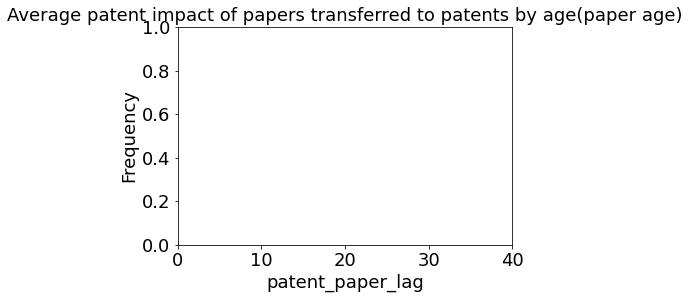

In [178]:
## Plot aggregate average number of times a paper gets transferred to patents per year
patent_CHI_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="CHI"].groupby(['patent_paper_lag','paperid'])['patent_id'].count()}).reset_index()
patent_CSCW_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="CSCW"].groupby(['patent_paper_lag','paperid'])['patent_id'].count()}).reset_index()
patent_UBI_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="UBI"].groupby(['patent_paper_lag','paperid'])['patent_id'].count()}).reset_index()
patent_UIST_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="UIST"].groupby(['patent_paper_lag','paperid'])['patent_id'].count()}).reset_index()

f_CHI_year = patent_CHI_year[patent_CHI_year['count']>0].groupby(['patent_paper_lag', 'paperid'])['count'].sum()/ patent_CHI_year[patent_CHI_year['count']>0].groupby(['patent_paper_lag','paperid'])['count'].count()
f_CSCW_year = patent_CSCW_year[patent_CSCW_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_CSCW_year[patent_CSCW_year['count']>0].groupby('patent_paper_lag')['count'].count()
f_UBI_year = patent_UBI_year[patent_UBI_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_UBI_year[patent_UBI_year['count']>0].groupby('patent_paper_lag')['count'].count()
f_UIST_year = patent_UIST_year[patent_UIST_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_UIST_year[patent_UIST_year['count']>0].groupby('patent_paper_lag')['count'].count()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([0,40])
plt.xlabel('patent_paper_lag', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.title('Average patent impact of papers transferred to patents by age(paper age)', fontsize = 18)
plt.plot(f_CHI_year.index, f_CHI_year, 'o-', label = 'CHI', color = 'red', linewidth = 3)
plt.plot(f_CSCW_year.index, f_CSCW_year, 'o-', label = 'CSCW', color = 'blue', linewidth = 3)
plt.plot(f_UBI_year.index, f_UBI_year, 'o-', label = 'UBI', color = 'green', linewidth = 3)
plt.plot(f_UIST_year.index, f_UIST_year, 'o-', label = 'UIST', color = 'cyan', linewidth = 3)
plt.legend(loc = 'upper left')
plt.rc('font', **font)
plt.show()


In [ ]:
#------------ analyze popular transferred paper -------------#
CHI_pd = pd.read_csv("papercitations_CHI.tsv", sep=',')
CSCW_pd = pd.read_csv("papercitations_CSCW.tsv", sep=',')
UIST_pd = pd.read_csv("papercitations_UIST.tsv", sep=',')
UBI_pd = pd.read_csv("papercitations_UBI.tsv", sep=',')

CHI_pcs_pd = pd.read_csv("../papercitation2science_extracted/papercitationscience_result_CHI.tsv", sep=',')
CSCW_pcs_pd = pd.read_csv("../papercitation2science_extracted/papercitationscience_result_CSCW.tsv", sep=',')
UIST_pcs_pd = pd.read_csv("../papercitation2science_extracted/papercitationscience_result_UIST.tsv", sep=',')
UBI_pcs_pd = pd.read_csv("../papercitation2science_extracted/papercitationscience_result_UBI.tsv", sep=',')
pcs_pd_list = [CHI_pcs_pd, CSCW_pcs_pd, UIST_pcs_pd, UBI_pcs_pd]
pd_list = [CHI_pd, CSCW_pd, UIST_pd, UBI_pd]

for idx in range(4):
    citation_pd = pd_list[idx]
    cited_paper_num = {}
    cited_patent_num = {}
    for row in citation_pd.iterrows():
        citing_paperid_str = str(row).split()[5] # paperid
        cited_paperid_str = str(row).split()[7]
        if cited_paperid_str in cited_paper_num.keys():
            cited_paper_num[cited_paperid_str] += 1
        else:
            cited_paper_num[cited_paperid_str] = 1
    result = []
    paperid_list = []
    # print(cited_paper_num)
    pcs_pd = pcs_pd_list[idx]
    for row in pcs_pd.iterrows():
        paperid = str(row).split()[9]
        patentid = str(row).split()[11]
        paperid_list.append(paperid)
        if paperid in cited_patent_num.keys():
            cited_patent_num[paperid] += 1
        else:
            cited_patent_num[paperid] = 1
    for k, v in cited_paper_num.items():
        if k not in cited_patent_num.keys():
            cited_patent_num[k] = 0                
        result.append(list([k, str(cited_paper_num[k]), str(cited_patent_num[k])]))
    result_pd = pd.DataFrame(data=result, columns=['paperid', 'citedbypapers', 'citedbypatents'])
    result_pd.to_csv('popular_transferred_paper{}.tsv'.format(idx))